**MAESTRÍA EN INTELIGENCIA ARTIFICIAL  APLICADA**

**Curso: TC5044 - Operaciones de aprendizaje automático (MLOps)**

**Tecnológico de Monterrey**

Dr. Gerardo Rodríguez Hernández

Prof. José Ángel Martínez Navarro

**Semana 5**
Fase 1 | Avance de Proyecto

**Equipo 18**
- Ali Mateo Campos Martínez      A01796071
- Mario Fonseca Martínez         A01795228
- Miguel Ángel Hernández Núñez   A01795751
- Jonatan Israel Meza Mendoza    A01275322
- Eder Mauricio Castillo Galindo A01795453

---

In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
# Cargar dataset modificado
df = pd.read_csv("../data/raw/turkish_music_emotion_modified.csv")

# Revisar primeras filas
df.head()

Class _RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean _Tempo_Mean  \
0  relax           0.052              NaN              9.136     130.043   
1  relax           0.125            0.439              6.680      142.24   
2  relax           0.046            0.639             10.578     188.154   
3  relax           0.135            0.603             10.442      65.991   
4  relax           0.066            0.591              9.769       88.89   

   _MFCC_Mean_1  _MFCC_Mean_2 _MFCC_Mean_3 _MFCC_Mean_4 _MFCC_Mean_5  ...  \
0         3.997         0.363        0.887        0.078        0.221  ...   
1         4.058         0.516        0.785        0.397        0.556  ...   
2         2.775         0.903        0.502        0.329        0.287  ...   
3         2.841         1.552        0.612        0.351        0.011  ...   
4         3.217         0.228        0.814        0.096        0.434  ...   

  _Chromagram_Mean_10 _Chromagram_Mean_11 _Chromagram_Mean_12  \
0               1.000               0.008               0.101   
1               1.000                 0.0               0.984   
2               0.746              0.016                  1.0   
3               1.000               0.161               0.757   
4               0.404                 1.0               0.001   

  _HarmonicChangeDetectionFunction_Mean _HarmonicChangeDetectionFunction_Std  \
0                                 0.316                                0.261   
1                                 0.285                                0.211   
2                                 0.413                   28.105999999999998   
3                                 error                                0.265   
4                                 0.345                                0.261   

  _HarmonicChangeDetectionFunction_Slope  \
0                                  0.018   
1                                 -0.082   
2                                  0.134   
3                                  0.042   
4                                 0.089    

  _HarmonicChangeDetectionFunction_PeriodFreq  \
0                                       1.035   
1                                       3.364   
2                                       1.682   
3                                       0.354   
4                                       0.748   

   _HarmonicChangeDetectionFunction_PeriodAmp  \
0                                       0.593   
1                                       0.702   
2                                       0.692   
3                                       0.743   
4                                       0.674   

  _HarmonicChangeDetectionFunction_PeriodEntropy mixed_type_col  
0                                           0.97            979  
1                                          0.967            943  
2                                         0.963             628  
3                                          0.968            192  
4                                          0.957            292  

[5 rows x 52 columns]

# **Tarea 2 y 3**. Manipulación, preparación, exploración y preprocesamiento de datos

## **Parte 1**. Análisis descriptivo (univariante)

In [6]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           403 non-null    object 
 1   _RMSenergy_Mean                                 401 non-null    object 
 2   _Lowenergy_Mean                                 404 non-null    float64
 3   _Fluctuation_Mean                               405 non-null    float64
 4   _Tempo_Mean                                     401 non-null    object 
 5   _MFCC_Mean_1                                    402 non-null    float64
 6   _MFCC_Mean_2                                    403 non-null    float64
 7   _MFCC_Mean_3                                    397 non-null    object 
 8   _MFCC_Mean_4                                    402 non-null    object 
 9   _MFCC_Mean_5                               

In [7]:
# Contar cuántas son object (texto/categorías)
num_object = df.select_dtypes(include="object")

# Contar cuántas son numéricas
num_numeric = df.select_dtypes(include="number")

print(f"Columnas tipo object: {num_object.shape[1]}")
print(f"Columnas numéricas: {num_numeric.shape[1]}")

Columnas tipo object: 38
Columnas numéricas: 14


In [8]:
# Porcentaje (%) de valores faltantes por columna
df.isna().sum().mul(100).div(len(df)).sort_values(ascending=False)

mixed_type_col                                    9.313725
_MFCC_Mean_11                                     2.696078
_MFCC_Mean_3                                      2.696078
_MFCC_Mean_5                                      1.960784
_Spectralcentroid_Mean                            1.960784
_MFCC_Mean_12                                     1.960784
_HarmonicChangeDetectionFunction_Mean             1.960784
_Pulseclarity_Mean                                1.715686
_RMSenergy_Mean                                   1.715686
_Tempo_Mean                                       1.715686
_HarmonicChangeDetectionFunction_Slope            1.715686
_MFCC_Mean_4                                      1.470588
_MFCC_Mean_1                                      1.470588
_MFCC_Mean_10                                     1.470588
_Spectralskewness_Mean                            1.470588
_AttackTime_Slope                                 1.470588
_Chromagram_Mean_7                                1.4705

### Análisis de variables numéricas

In [10]:
# Estadística descriptiva
df.describe().T

count         mean           std  \
_Lowenergy_Mean                              404.0     4.241829     50.714118   
_Fluctuation_Mean                            405.0     9.711723     32.204572   
_MFCC_Mean_1                                 402.0     6.270055     37.120651   
_MFCC_Mean_2                                 403.0     7.599908     77.807229   
_MFCC_Mean_13                                406.0     1.004042     19.712898   
_AttackTime_Slope                            402.0     4.055219     49.192974   
_Eventdensity_Mean                           405.0     8.865998     67.375263   
_Pulseclarity_Mean                           401.0     4.355584     49.896492   
_Spectralcentroid_Mean                       400.0  4625.624853  21765.211883   
_Chromagram_Mean_3                           405.0     2.682472     45.699208   
_Chromagram_Mean_6                           403.0     0.260638      0.290964   
_Chromagram_Mean_9                           403.0     3.230583     39.559735   
_Chromagram_Mean_10                          403.0     1.426670     16.400028   
_HarmonicChangeDetectionFunction_PeriodFreq  404.0     6.390490     46.300101   

                                                 min         25%        50%  \
_Lowenergy_Mean                                0.302     0.52300     0.5535   
_Fluctuation_Mean                              3.987     5.85200     6.7450   
_MFCC_Mean_1                                   0.423     1.95875     2.4200   
_MFCC_Mean_2                                 -43.608    -0.26700     0.0650   
_MFCC_Mean_13                                 -0.620    -0.04400     0.0390   
_AttackTime_Slope                             -0.465    -0.09300     0.0100   
_Eventdensity_Mean                             0.234     1.73700     2.7730   
_Pulseclarity_Mean                             0.011     0.13000     0.2180   
_Spectralcentroid_Mean                       606.524  1983.39500  2547.6780   
_Chromagram_Mean_3                             0.000     0.08300     0.2990   
_Chromagram_Mean_6                             0.000     0.01900     0.1420   
_Chromagram_Mean_9                             0.000     0.06900     0.2580   
_Chromagram_Mean_10                            0.000     0.26550     0.6180   
_HarmonicChangeDetectionFunction_PeriodFreq    0.187     0.96100     1.8020   

                                                    75%         max  
_Lowenergy_Mean                                 0.58500     805.528  
_Fluctuation_Mean                               7.83800     483.105  
_MFCC_Mean_1                                    2.90000     565.490  
_MFCC_Mean_2                                    0.41350     946.483  
_MFCC_Mean_13                                   0.10500     397.220  
_AttackTime_Slope                               0.08975     732.036  
_Eventdensity_Mean                              3.74200     998.241  
_Pulseclarity_Mean                              0.33100     794.363  
_Spectralcentroid_Mean                       3179.98675  318051.072  
_Chromagram_Mean_3                              0.59500     920.000  
_Chromagram_Mean_6                              0.44350       1.000  
_Chromagram_Mean_9                              0.63100     570.106  
_Chromagram_Mean_10                             1.00000     329.678  
_HarmonicChangeDetectionFunction_PeriodFreq     2.24300     615.897

In [11]:
# Forma (asimetría)
df.skew(numeric_only=True).sort_values(ascending=False)
# Todas las variables numéricas tienen sesgo positivo, es decir su promedio es mayor que la moda.

_MFCC_Mean_13                                  20.147970
_Chromagram_Mean_3                             20.118656
_Chromagram_Mean_10                            20.045608
_Lowenergy_Mean                                14.444717
_Chromagram_Mean_9                             14.111677
_Pulseclarity_Mean                             13.526342
_Fluctuation_Mean                              13.223509
_AttackTime_Slope                              12.887338
_Eventdensity_Mean                             12.461290
_MFCC_Mean_1                                   12.268594
_Spectralcentroid_Mean                         11.943330
_HarmonicChangeDetectionFunction_PeriodFreq    11.703957
_MFCC_Mean_2                                   10.380621
_Chromagram_Mean_6                              1.134205
dtype: float64

In [12]:
# Forma (curtosis)
df.kurt(numeric_only=True).sort_values(ascending=False)

_MFCC_Mean_13                                  405.960372
_Chromagram_Mean_3                             404.839071
_Chromagram_Mean_10                            402.209418
_Lowenergy_Mean                                211.045891
_Chromagram_Mean_9                             198.469578
_Pulseclarity_Mean                             192.842101
_Fluctuation_Mean                              180.148383
_AttackTime_Slope                              171.826077
_Eventdensity_Mean                             164.068311
_MFCC_Mean_1                                   163.872334
_Spectralcentroid_Mean                         150.161041
_HarmonicChangeDetectionFunction_PeriodFreq    143.717906
_MFCC_Mean_2                                   109.020740
_Chromagram_Mean_6                               0.253010
dtype: float64

In [13]:
def plot_numeric_eda(df: pd.DataFrame, bins: int = 20) -> None:
    """
    Genera histogramas y boxplots para todas las columnas numéricas del DataFrame.
    - Detecta automáticamente las columnas numéricas.
    - Muestra en pantalla ambas visualizaciones.

    Parámetros:
        df (pd.DataFrame): DataFrame a analizar
        bins (int): número de intervalos para los histogramas
    """
    numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()

    if not numeric_cols:
        print("No se encontraron columnas numéricas en el DataFrame!")
        return

    #print(f"Columnas numéricas detectadas ({len(numeric_cols)}): {numeric_cols}\n")

    # --- Histogramas ---
    print("Distribución de variables numéricas (Histogramas)")
    df[numeric_cols].hist(
        figsize=(15, 10),
        bins=bins,
        color="skyblue",
        edgecolor="black"
    )
    plt.suptitle("Distribución de variables numéricas", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # --- Boxplots ---
    print("\nDispersión y posibles outliers (Boxplots)")
    df[numeric_cols].plot(
        kind="box",
        subplots=True,
        layout=(max(1, len(numeric_cols) // 3 + 1), 3),
        figsize=(15, 16),
        sharex=False,
        sharey=False,
        vert=False,
        color=dict(boxes="blue", whiskers="black", medians="red", caps="gray")
    )
    plt.suptitle("Boxplots de variables numéricas", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Distribución de variables numéricas (Histogramas)


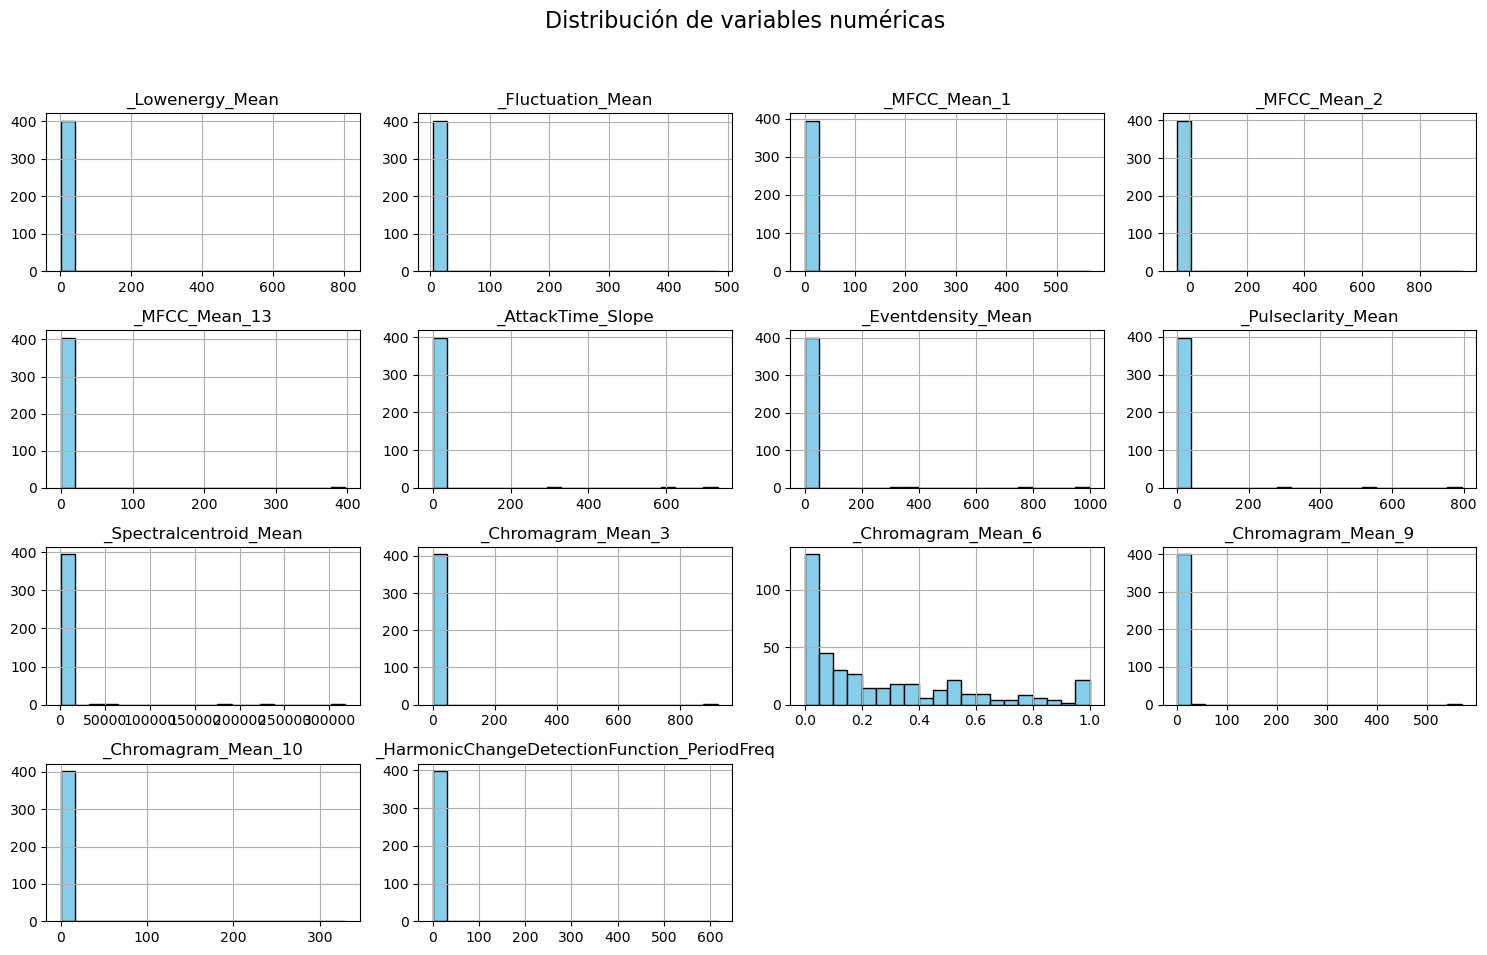


Dispersión y posibles outliers (Boxplots)


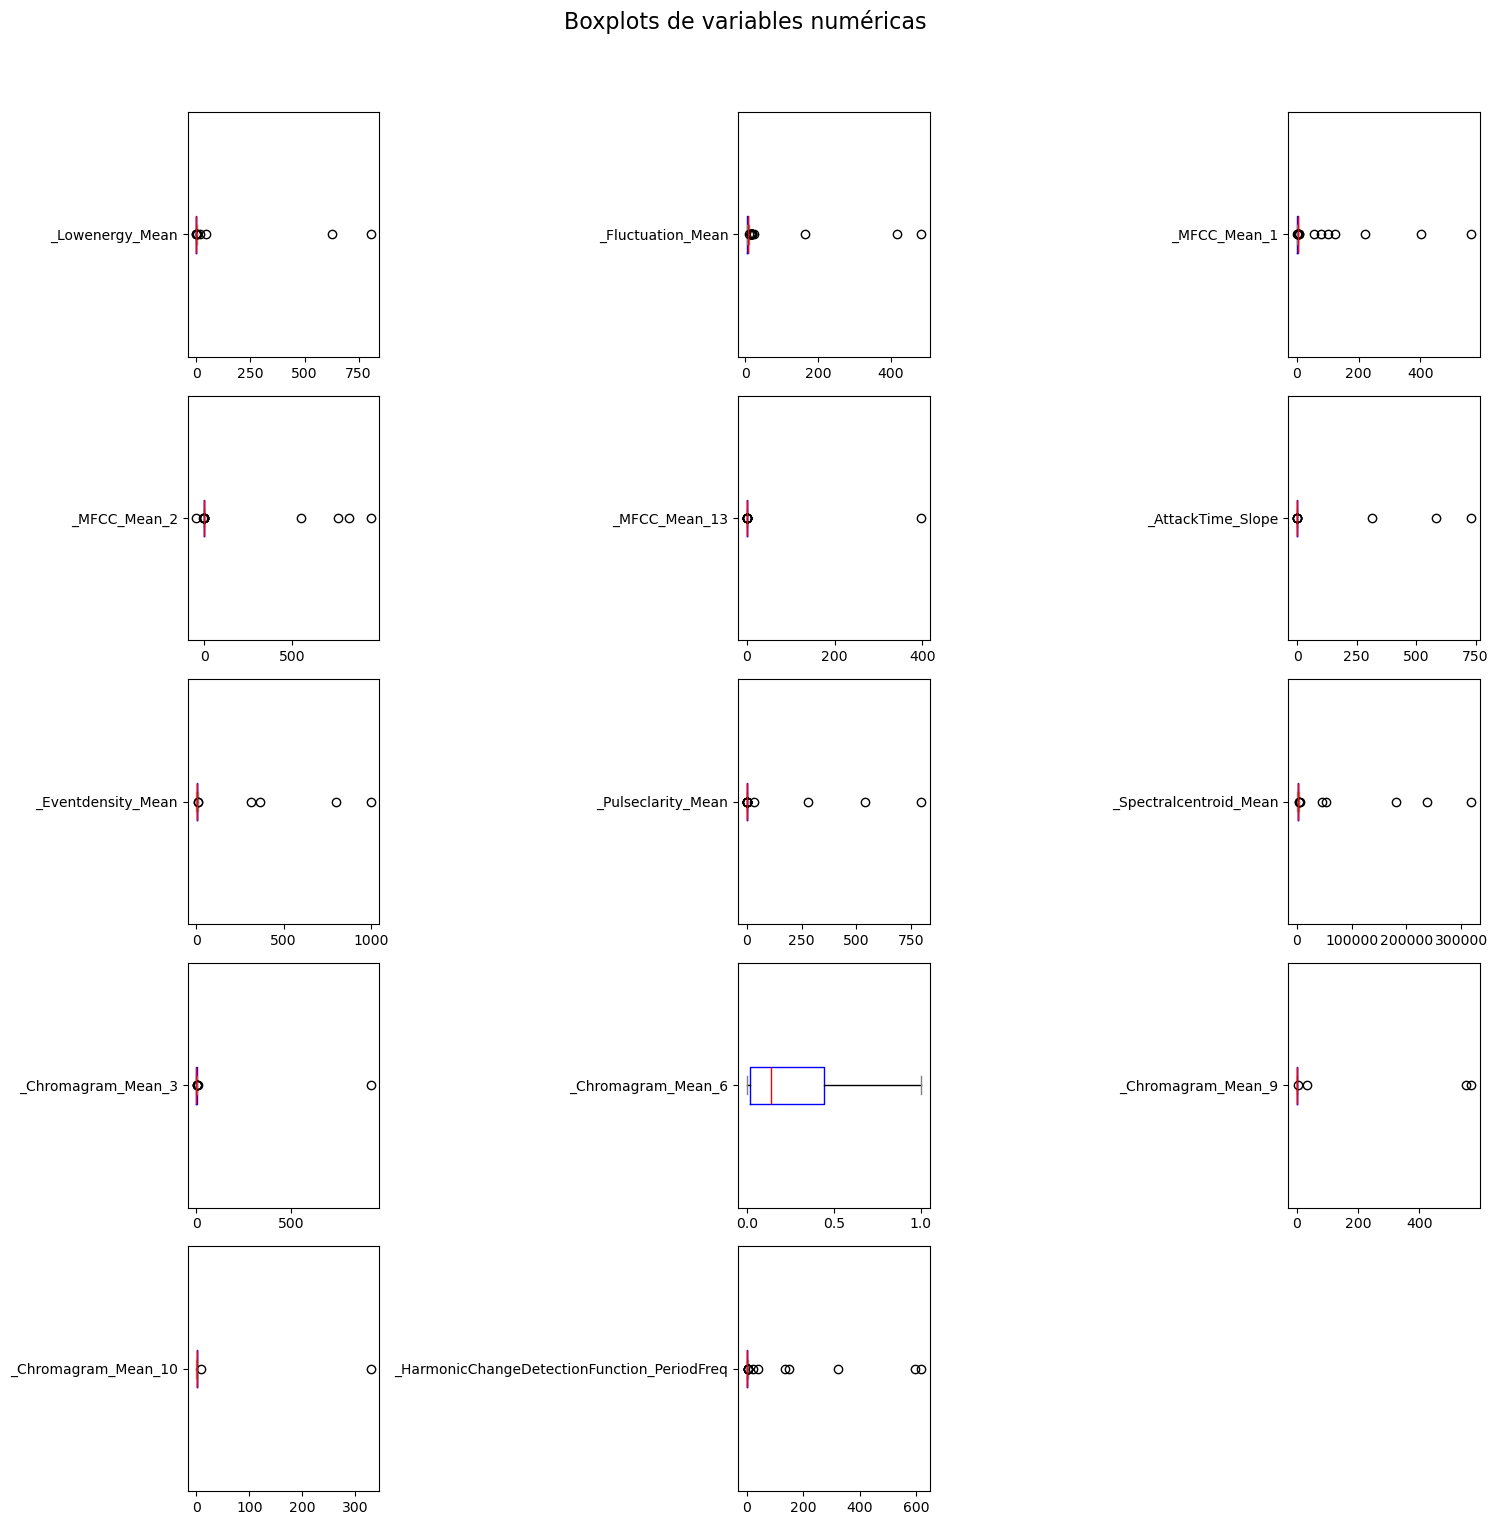

In [14]:
# Gráficas
plot_numeric_eda(df)

- Los histogramas anteriores sugieren que existen varios valores atípicos en diferentes columnas.

### Análisis de variables categóricas

In [17]:
# Descripción estadística
df.describe(include='O').T

count unique       top freq
Class                                            403      8     relax  100
_RMSenergy_Mean                                  401    211      0.06    6
_Tempo_Mean                                      401    384   150.255    3
_MFCC_Mean_3                                     397    320     0.259    5
_MFCC_Mean_4                                     402    328     0.123    5
_MFCC_Mean_5                                     400    301     0.124    4
_MFCC_Mean_6                                     404    305     0.138    5
_MFCC_Mean_7                                     405    310     0.073    5
_MFCC_Mean_8                                     405    285     0.037    6
_MFCC_Mean_9                                     405    286    -0.018    5
_MFCC_Mean_10                                    402    278     0.114    5
_MFCC_Mean_11                                    397    267     0.043    6
_MFCC_Mean_12                                    400    281    -0.009    5
_Roughness_Mean                                  405    387  1802.253    3
_Roughness_Slope                                 406    298     0.064    6
_Zero-crossingrate_Mean                          406    388   382.749    3
_AttackTime_Mean                                 405     75     0.025   29
_Rolloff_Mean                                    405    388  4301.699    3
_Brightness_Mean                                 405    288     0.458    4
_Spectralspread_Mean                             404    386  1477.092    2
_Spectralskewness_Mean                           402    357     2.128    3
_Spectralkurtosis_Mean                           405    379       5.1    2
_Spectralflatness_Mean                           403    109     0.052   12
_EntropyofSpectrum_Mean                          406    157     0.898    8
_Chromagram_Mean_1                               403    269       0.0   39
_Chromagram_Mean_2                               404    246       0.0   53
_Chromagram_Mean_4                               403    251       0.0   50
_Chromagram_Mean_5                               403    304       1.0   22
_Chromagram_Mean_7                               402    248       0.0   46
_Chromagram_Mean_8                               407    290       1.0   38
_Chromagram_Mean_11                              404    280       1.0   26
_Chromagram_Mean_12                              406    263       1.0   38
_HarmonicChangeDetectionFunction_Mean            400    191     0.342    7
_HarmonicChangeDetectionFunction_Std             407    182     0.183    8
_HarmonicChangeDetectionFunction_Slope           401    254    -0.015    7
_HarmonicChangeDetectionFunction_PeriodAmp       403    207     0.831    7
_HarmonicChangeDetectionFunction_PeriodEntropy   404     46     0.969   49
mixed_type_col                                   370    257       bad   42

- No sólo el nombre de las columnas sino adicionalmente la moda de la tabla anterior sugiere que son realmente valores numéricos. mixed_type_col y Class son las únicas que sugieren ser tipo string. A continuación revisamos el detalle:

In [19]:
# Recuentos únicos (número de ocurrencias para cada valor único)
cat_cols = ["Class", "mixed_type_col"]

for col in cat_cols:
    print(df[col].value_counts(dropna=False))
    print("\n")

Class
relax      100
sad         99
happy       98
angry       93
NaN          5
 HAPPY       4
 ANGRY       4
 SAD         3
 RELAX       2
Name: count, dtype: int64


mixed_type_col
bad        42
unknown    39
NaN        38
987         3
979         2
           ..
376         1
206         1
373         1
448         1
136         1
Name: count, Length: 258, dtype: int64




In [20]:
def plot_counts(df: pd.DataFrame, col: str, ascending: bool = False, horizontal: bool = False) -> None:
    """
    Grafica el conteo de valores únicos en una columna categórica.
    
    Parámetros:
        df (pd.DataFrame): DataFrame de entrada.
        col (str): Nombre de la columna a graficar.
        ascending (bool): Si True, ordena por frecuencia ascendente.
        horizontal (bool): Si True, muestra el gráfico de barras horizontal.
    """
    # Contar valores
    counts = df[col].value_counts(ascending=ascending, dropna=False)

    # Crear figura
    fig, ax = plt.subplots(figsize=(8, 5))
    
    if horizontal:
        counts.plot(kind="barh", color="skyblue", edgecolor="black", ax=ax)
        ax.set_xlabel("Conteo")
        ax.set_ylabel(col)
        ax.set_title(f"Distribución de {col}")
        for i, (value, count) in enumerate(counts.items()):
            ax.text(count + 0.5, i, str(count), va="center", fontsize=10)
    else:
        counts.plot(kind="bar", color="skyblue", edgecolor="black", ax=ax)
        ax.set_ylabel("Conteo")
        ax.set_xlabel(col)
        ax.set_title(f"Distribución de {col}")
        for i, count in enumerate(counts):
            ax.text(i, count + 0.5, str(count), ha="center", va="bottom", fontsize=10)
    
    plt.tight_layout()
    plt.show()

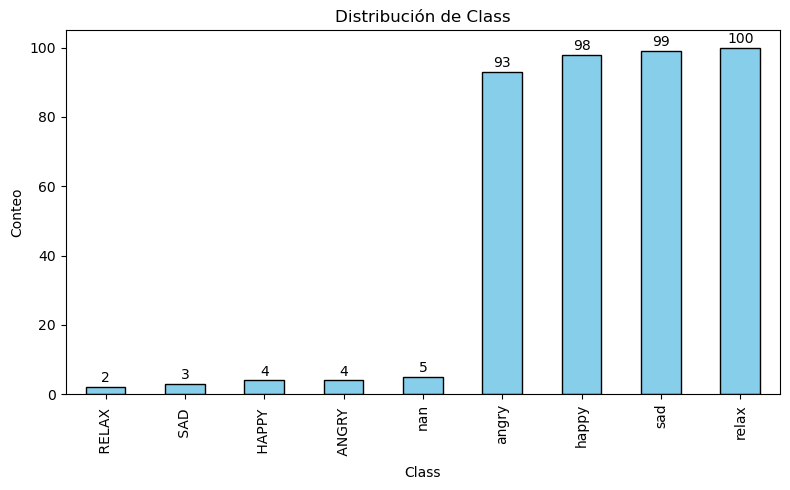

In [21]:
plot_counts(df, "Class", ascending=True)

* "mixed_type_col" también parece ser un numérica, sólo que se requiere cambiar "bad" y "unknown" por nulos inicialmente.
* La columna "Class" sólo requiere remover espacios al inicio y final de cada cadena y luego estandarizar así:
    * relax = RELAX
    * sad = SAD
    * happy = HAPPY
    * angry = ANGRY
* La columna "Class" y "mixed_type_col" también tiene valores faltantes.
* De esa manera la única categórica sería nuestra variable a predecir "Class". Por lo tanto creamos una función para convertirlas a numéricas las que faltan:

## **Parte 1.1**. Preprocesamiento - Limpieza Estructural
- Se propone sólo aplicar cambios a todo el conjunto de datos que sólo afecten la estructura intrínseca y que no se basen en estadísticas calculadas sobre la distribución de las variables. Como por ejemplo, la conversión de tipos de datos de objetos a numérico a las variables que aplique, estandarización de texto y typos en las variables categóricas y eliminación de duplicados. Finalmente, eliminación de columnas con tantos vacíos que no aportan al modelo según referencias bibliográficas, como la columna "mixed_type_col".

In [24]:
def clean_object_columns_to_numeric(
    df: pd.DataFrame,
    target_col: str = "Class"
) -> tuple[pd.DataFrame, dict]:
    """
    Limpia columnas tipo object en un DataFrame:
    - Quita espacios al inicio y final.
    - Elimina espacios internos.
    - Reemplaza comas por puntos (ej: "0,56" -> "0.56").
    - Convierte a numérico con errors='coerce' (valores no numéricos -> NaN).
    - Excluye la columna objetivo (por defecto 'Class').
    - Genera un reporte con los valores no convertibles por columna.

    Retorna:
        df_clean: DataFrame limpio.
        non_numeric_report: dict {columna: [valores no convertibles]}
    """
    df_clean = df.copy()
    non_numeric_report = {}

    for col in df_clean.select_dtypes(include="object").columns:
        if col == target_col:
            continue  # excluir la variable objetivo

        # Guardar versión original para comparación
        original_values = df_clean[col].copy()

        # Limpieza general
        df_clean[col] = (
            df_clean[col]
            .astype(str)
            .str.strip()           # eliminar espacios extremos
            .str.replace(" ", "", regex=False)  # eliminar espacios internos
            .str.replace(",", ".", regex=False)  # cambiar coma por punto
        )

        # Convertir a número
        df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

        # Redondear a 3 cifras
        df_clean[col] = df_clean[col].round(3)

        # Detectar valores que se volvieron NaN
        mask_nan = df_clean[col].isna()
        invalid_values = original_values[mask_nan].dropna().unique()

        if len(invalid_values) > 0:
            non_numeric_report[col] = invalid_values.tolist()

    return df_clean, non_numeric_report

In [25]:
# Conversión de tipos de datos de objetos a numérico
df_clean, report = clean_object_columns_to_numeric(df, target_col="Class")

In [26]:
print("\n Reporte de valores no convertibles:\n")
for col, vals in report.items():
    print(f" - {col}: {vals}")


 Reporte de valores no convertibles:

 - _RMSenergy_Mean: ['error']
 - _Tempo_Mean: ['error', 'invalid']
 - _MFCC_Mean_3: ['?']
 - _MFCC_Mean_4: ['invalid', 'error']
 - _MFCC_Mean_5: ['invalid']
 - _MFCC_Mean_6: ['?']
 - _MFCC_Mean_7: ['error']
 - _MFCC_Mean_8: ['invalid']
 - _MFCC_Mean_9: ['?']
 - _MFCC_Mean_10: ['error']
 - _MFCC_Mean_11: [' NAN ']
 - _MFCC_Mean_12: ['?', 'error']
 - _Roughness_Mean: ['invalid']
 - _Roughness_Slope: ['error']
 - _Zero-crossingrate_Mean: ['error']
 - _AttackTime_Mean: ['?']
 - _Rolloff_Mean: [' ERROR ', ' NAN ', ' INVALID ']
 - _Brightness_Mean: ['invalid', '?']
 - _Spectralspread_Mean: ['error']
 - _Spectralskewness_Mean: ['error', 'invalid', '?']
 - _Spectralkurtosis_Mean: ['invalid', 'error']
 - _Spectralflatness_Mean: ['invalid', 'error']
 - _EntropyofSpectrum_Mean: ['invalid', '?']
 - _Chromagram_Mean_1: ['invalid', ' NAN ']
 - _Chromagram_Mean_2: ['error']
 - _Chromagram_Mean_4: ['?']
 - _Chromagram_Mean_5: ['error', '?']
 - _Chromagram_Mean_7:

- Teniendo en cuenta los resultados anteriores sobre la columna objetivo, es evidente que se tienen solamente 4 clases, por lo que procedemos a realizar una función para procesar la variable objetivo:

In [28]:
def normalize_target_column(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Normaliza la columna de clases:
    - Convierte a string
    - Strip: elimina espacios al inicio y al final
    - Convierte a minúsculas
    - Reemplaza valores no válidos por NaN
    """
    df_clean = df.copy()
    
    df_clean[col] = (
        df_clean[col]
        .astype(str)             # asegurar string
        .str.strip()             # quitar espacios extremos
        .str.lower()             # pasar a minúsculas
    )
    
    # Reemplazar valores "nan" de texto (que aparecen al convertir) por np.nan
    df_clean[col] = df_clean[col].replace("nan", pd.NA)
    
    # Mantener solo las clases válidas
    valid_classes = {"happy", "sad", "angry", "relax"}
    df_clean.loc[~df_clean[col].isin(valid_classes), col] = pd.NA
    
    return df_clean

In [29]:
# Estandarización de texto y typos en las variables categóricas
df_clean = normalize_target_column(df_clean, "Class")

In [30]:
df_clean["Class"].value_counts(dropna=False)

Class
relax    102
happy    102
sad      102
angry     97
<NA>       5
Name: count, dtype: int64

- Dado a que los faltantes en la variable objetivo son menos del 2%, se eliminarán pues no tiene sentido imputar esas etiquetas cuando son pocos faltantes.

In [32]:
df_clean = df_clean.dropna(subset=["Class"])

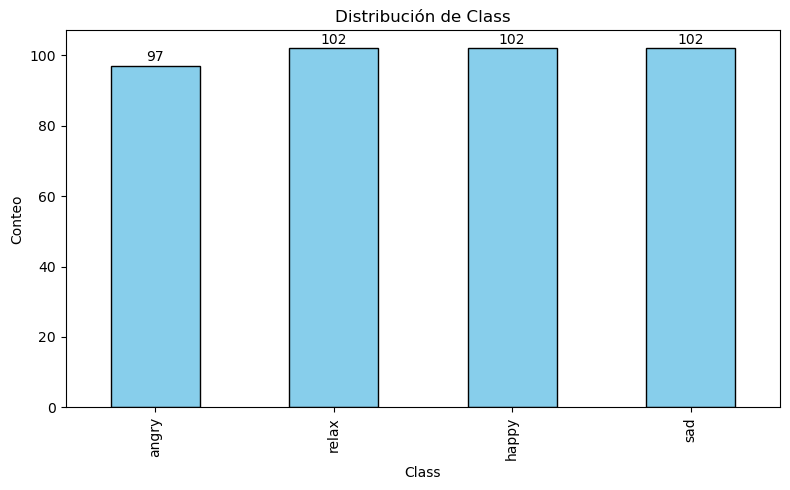

In [33]:
plot_counts(df_clean, "Class", ascending=True)

In [34]:
df_clean.describe(include='O').T

count unique    top freq
Class   403      4  relax  102

- La clase más grande (relax, con 102) es casi idéntica a la más pequeña (angry, con 97). La diferencia es de solo 5 instancias, lo que representa una variación mínima en el conjunto de datos (aproximadamente un 1.2% del total de las 403 instancias).
- Se concluye que no se requiere balanceo de clases.
- Volvemos a revisar la cantidad de faltantes después del preprocesamiento de limpieza estructural.

In [36]:
df_clean.isna().sum().mul(100).div(len(df_clean)).sort_values(ascending=False)

mixed_type_col                                    28.784119
_MFCC_Mean_3                                       2.977667
_MFCC_Mean_11                                      2.977667
_MFCC_Mean_12                                      2.729529
_RMSenergy_Mean                                    2.481390
_MFCC_Mean_5                                       2.233251
_Tempo_Mean                                        2.233251
_Spectralskewness_Mean                             2.233251
_HarmonicChangeDetectionFunction_Mean              2.233251
_MFCC_Mean_4                                       1.985112
_HarmonicChangeDetectionFunction_PeriodEntropy     1.985112
_Spectralcentroid_Mean                             1.985112
_HarmonicChangeDetectionFunction_Slope             1.985112
_MFCC_Mean_10                                      1.985112
_Spectralflatness_Mean                             1.736973
_Pulseclarity_Mean                                 1.736973
_Chromagram_Mean_1                      

- En la práctica de feature engineering, 25% se usa como umbral operativo para eliminar una columna con esa cantidad de faltantes. Dado a que la columna "mixed_type_col" tiene casi el 30% de valores faltantes, se decide eliminarla pues supera el umbral operativo definido.

Algunas referencias:
- “When more than 20–30% of data in a variable are missing, imputation becomes unreliable, and analysts should consider excluding that variable unless the missingness mechanism is well understood.” (Little, R. J. A., & Rubin, D. B. (2002). Statistical Analysis with Missing Data. Wiley.)
- “High rates of missingness (above 40%) often yield unstable imputations, and dropping the variable may be preferable unless domain knowledge dictates otherwise.” (Van Buuren, S. (2018). Flexible Imputation of Missing Data. CRC Press.)
- “Variables with more than 25% missing values are often removed unless they have strong theoretical justification.” (Kuhn, M., & Johnson, K. (2013). Applied Predictive Modeling. Springer.)

In [38]:
# Eliminación de columnas que superan en umbral operativo con vacios en sus valores
df_clean = df_clean.drop(columns=["mixed_type_col"])

In [39]:
n_duplicates = df_clean.duplicated().sum()

if n_duplicates > 0:
    print(f"Se encontraron {n_duplicates} filas duplicadas. Serán eliminadas.")
    df_clean = df_clean.drop_duplicates()
    print(f"Después de eliminar, el DataFrame tiene {len(df_clean)} filas.")
else:
    print("No se encontraron filas duplicadas.")

Se encontraron 2 filas duplicadas. Serán eliminadas.
Después de eliminar, el DataFrame tiene 401 filas.


In [40]:
df_clean.describe(include='O').T

count unique    top freq
Class   401      4  relax  102

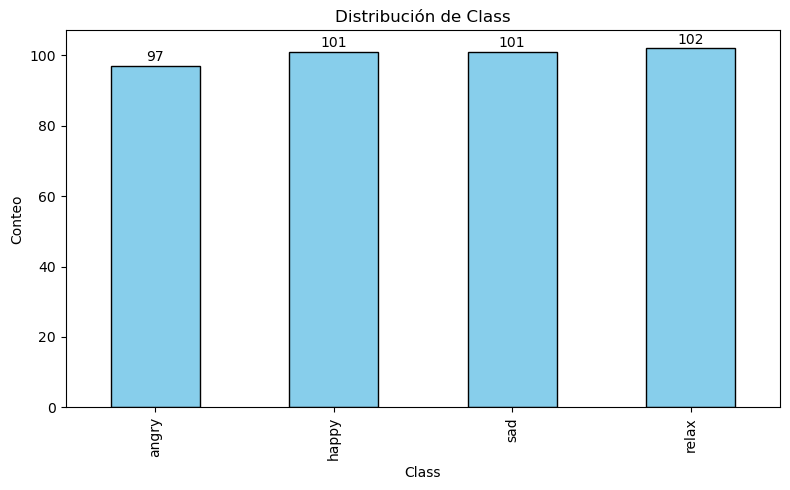

In [41]:
plot_counts(df_clean, "Class", ascending=True)

In [42]:
# Forma (asimetría) después de la limpieza estructural
df_clean.skew(numeric_only=True).sort_values(ascending=False)
# Todas las variables numéricas tienen sesgo positivo, es decir su promedio es mayor que la moda.

_MFCC_Mean_13                                     19.973542
_Chromagram_Mean_3                                19.944061
_Roughness_Slope                                  19.928189
_MFCC_Mean_8                                      19.924412
_Chromagram_Mean_4                                19.896857
_MFCC_Mean_7                                      19.871535
_Chromagram_Mean_10                               19.870991
_MFCC_Mean_4                                      19.817925
_MFCC_Mean_10                                     19.748757
_Tempo_Mean                                       19.706812
_HarmonicChangeDetectionFunction_PeriodAmp        19.289743
_Spectralspread_Mean                              18.976455
_MFCC_Mean_9                                      18.804332
_HarmonicChangeDetectionFunction_Std              18.670152
_Chromagram_Mean_1                                18.642952
_HarmonicChangeDetectionFunction_Mean             18.503613
_Spectralskewness_Mean                  

In [43]:
# Forma (curtosis) después de la limpieza estructural
df_clean.kurt(numeric_only=True).sort_values(ascending=False)

_MFCC_Mean_13                                     398.961496
_Chromagram_Mean_3                                397.842588
_Roughness_Slope                                  397.411478
_MFCC_Mean_8                                      396.988101
_Chromagram_Mean_4                                395.923047
_MFCC_Mean_7                                      395.542063
_Chromagram_Mean_10                               395.229482
_MFCC_Mean_4                                      392.833693
_MFCC_Mean_10                                     391.064122
_Tempo_Mean                                       389.561719
_HarmonicChangeDetectionFunction_PeriodAmp        378.458393
_Spectralspread_Mean                              371.670543
_MFCC_Mean_9                                      368.955241
_HarmonicChangeDetectionFunction_Std              359.370439
_Chromagram_Mean_1                                357.811757
_HarmonicChangeDetectionFunction_Mean             353.060930
_Spectralskewness_Mean  

In [44]:
df_clean.describe().T

count         mean  \
_RMSenergy_Mean                                 391.0     3.384156   
_Lowenergy_Mean                                 397.0     4.306869   
_Fluctuation_Mean                               398.0     9.781450   
_Tempo_Mean                                     392.0   153.870395   
_MFCC_Mean_1                                    396.0     6.330854   
_MFCC_Mean_2                                    396.0     7.731732   
_MFCC_Mean_3                                    389.0     9.184010   
_MFCC_Mean_4                                    393.0     2.548300   
_MFCC_Mean_5                                    392.0     5.780663   
_MFCC_Mean_6                                    396.0     0.037124   
_MFCC_Mean_7                                    397.0     1.377844   
_MFCC_Mean_8                                    397.0     2.198113   
_MFCC_Mean_9                                    395.0     0.094871   
_MFCC_Mean_10                                   393.0     0.788832   
_MFCC_Mean_11                                   389.0     0.047360   
_MFCC_Mean_12                                   390.0     0.007487   
_MFCC_Mean_13                                   399.0     1.020917   
_Roughness_Mean                                 397.0   526.392254   
_Roughness_Slope                                398.0     2.581862   
_Zero-crossingrate_Mean                         398.0  1465.440068   
_AttackTime_Mean                                396.0     4.263538   
_AttackTime_Slope                               395.0     4.126582   
_Rolloff_Mean                                   395.0  6541.658213   
_Eventdensity_Mean                              398.0     8.969128   
_Pulseclarity_Mean                              394.0     4.429467   
_Brightness_Mean                                396.0     6.032712   
_Spectralcentroid_Mean                          393.0  4665.756830   
_Spectralspread_Mean                            396.0  3297.820960   
_Spectralskewness_Mean                          392.0     4.085429   
_Spectralkurtosis_Mean                          396.0    12.535025   
_Spectralflatness_Mean                          394.0     2.971876   
_EntropyofSpectrum_Mean                         397.0     4.263093   
_Chromagram_Mean_1                              394.0     2.400444   
_Chromagram_Mean_2                              396.0     3.853242   
_Chromagram_Mean_3                              398.0     2.723000   
_Chromagram_Mean_4                              396.0     1.519644   
_Chromagram_Mean_5                              394.0    10.019117   
_Chromagram_Mean_6                              396.0     0.263321   
_Chromagram_Mean_7                              395.0     7.752866   
_Chromagram_Mean_8                              397.0     8.960025   
_Chromagram_Mean_9                              396.0     3.283705   
_Chromagram_Mean_10                             396.0     1.443848   
_Chromagram_Mean_11                             394.0     3.304381   
_Chromagram_Mean_12                             398.0     2.593010   
_HarmonicChangeDetectionFunction_Mean           392.0     1.688934   
_HarmonicChangeDetectionFunction_Std            397.0     2.341839   
_HarmonicChangeDetectionFunction_Slope          393.0     3.213865   
_HarmonicChangeDetectionFunction_PeriodFreq     397.0     6.474257   
_HarmonicChangeDetectionFunction_PeriodAmp      395.0     2.460294   
_HarmonicChangeDetectionFunction_PeriodEntropy  393.0     4.992941   

                                                         std      min  \
_RMSenergy_Mean                                    48.244815    0.010   
_Lowenergy_Mean                                    51.157993    0.302   
_Fluctuation_Mean                                  32.482600    3.987   
_Tempo_Mean                                       609.792194   48.284   
_MFCC_Mean_1                                       37.398159    0.423   
_MFCC_Mean_2                           

- Varias variables (como _Chromagram_Mean_X, _Spectralkurtosis_Mean) muestran skewness > 1, donde la media no representa bien la centralidad, por lo que se decide aplicar la mediana como valor de imputación para valores nulos. Además de que la mediana no se ve afectada por valores extremos.

## **Parte 2**. Preprocesamiento: Outliers -> SimpleImputer -> StandardScaler
- Tareas basadas en estadísticas de distribución (como la imputación de nulos y el tratamiento de outliers) deben hacerse después de la limpieza estructural sobre conjuntos de datos separados para evitar la fuga de datos (data leakage).

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [48]:
def get_iqr_thresholds(series: pd.Series, factor: float = 1.5) -> tuple:
    """Calcula y retorna los límites inferior y superior del IQR para una serie."""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return lower_bound, upper_bound

def replace_outliers_with_nan(df: pd.DataFrame, thresholds: dict) -> pd.DataFrame:
    """Aplica los umbrales precalculados para reemplazar outliers por NaN."""
    df_out = df.copy()
    
    for col, (lower_bound, upper_bound) in thresholds.items():
        # Aplicar los umbrales (calculados previamente)
        mask_outliers = (df_out[col] < lower_bound) | (df_out[col] > upper_bound)
        
        # Opcional: imprimir la cantidad de outliers encontrados en este set
        n_outliers = mask_outliers.sum()
        if n_outliers > 0:
             print(f"- '{col}': {n_outliers}")
             
        df_out.loc[mask_outliers, col] = np.nan
        
    return df_out

In [49]:
# Separación de X e Y
Y = df_clean["Class"].copy()
X = df_clean.drop(columns=["Class"]).copy()

# Separación en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=23, stratify=Y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=23, stratify=y_temp)

# FIT: Calcular Umbrales SOLO con X_train (EVITANDO FUGA DE DATOS)
iqr_thresholds = {}
numeric_cols = X_train.select_dtypes(include=["number"]).columns.tolist()

for col in numeric_cols:
    lower, upper = get_iqr_thresholds(X_train[col])
    iqr_thresholds[col] = (lower, upper)
    
print("Umbrales IQR calculados (fitted) solo en X_train.")

# TRANSFORM: Aplicar los umbrales a todos los sets

print("\nTransformando X_train: (outliers reemplazados por NaN en el set actual)")
X_train = replace_outliers_with_nan(X_train, iqr_thresholds)

print("\nTransformando X_val:")
X_val = replace_outliers_with_nan(X_val, iqr_thresholds)

print("\nTransformando X_test:")
X_test = replace_outliers_with_nan(X_test, iqr_thresholds)

Umbrales IQR calculados (fitted) solo en X_train.

Transformando X_train: (outliers reemplazados por NaN en el set actual)
- '_RMSenergy_Mean': 5
- '_Lowenergy_Mean': 10
- '_Fluctuation_Mean': 13
- '_Tempo_Mean': 1
- '_MFCC_Mean_1': 12
- '_MFCC_Mean_2': 6
- '_MFCC_Mean_3': 8
- '_MFCC_Mean_4': 11
- '_MFCC_Mean_5': 7
- '_MFCC_Mean_6': 8
- '_MFCC_Mean_7': 8
- '_MFCC_Mean_8': 13
- '_MFCC_Mean_9': 7
- '_MFCC_Mean_10': 9
- '_MFCC_Mean_11': 11
- '_MFCC_Mean_12': 7
- '_MFCC_Mean_13': 12
- '_Roughness_Mean': 13
- '_Roughness_Slope': 9
- '_Zero-crossingrate_Mean': 5
- '_AttackTime_Mean': 23
- '_AttackTime_Slope': 8
- '_Rolloff_Mean': 2
- '_Eventdensity_Mean': 4
- '_Pulseclarity_Mean': 11
- '_Brightness_Mean': 3
- '_Spectralcentroid_Mean': 6
- '_Spectralspread_Mean': 1
- '_Spectralskewness_Mean': 14
- '_Spectralkurtosis_Mean': 22
- '_Spectralflatness_Mean': 10
- '_EntropyofSpectrum_Mean': 14
- '_Chromagram_Mean_1': 2
- '_Chromagram_Mean_2': 16
- '_Chromagram_Mean_3': 2
- '_Chromagram_Mean_4': 16


In [50]:
print("Tamaños finales:")
print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)

Tamaños finales:
Train: (280, 50)
Val: (60, 50)
Test: (61, 50)


- Según nuestro análisis anterior, no tenemos tantos valores NaN, por lo tanto, podemos imputar con la mediana, con el objetivo de estar exentos (dentro de lo posible) de valores 'outliers'.
- Es una buena práctica escalar las caracterísiticas para que el modelo no se vea sesgado por los datos. La escala es esencialmente el proceso de acercar todas las características a un rango o escala similar o igual, como transformarlas para que todos los valores estén entre 0 y 1.

Según la siguiente información (When To Use MinMaxScaler Vs StandardScaler | Kaggle, s. f.), vamos a utilizar "standardScaler":

**Standardization:**

- Results in a distribution with 0 mean and 1 standard deviation.
- Many ML algorithms (particularly deep learning algorithms) assume data has a standard normal distribution with 0 mean and unit variance.
- Sensitive to outliers.
- Better for data which is already normally distributed.

**Min-Max Scaling:**

- Restricts value range to [0,1].
- Sensitive to outliers.
- Because it restricts the value range to 0,1, it preserves values of 0 in the case of sparse data.
- Preserves original distribution/shape of the data.
  
[1] When to use MinMaxScaler vs StandardScaler | Kaggle. (s. f.). https://www.kaggle.com/discussions/questions-and-answers/529881

In [52]:
# Pipeline para imputar con la mediana
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Combinación final
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_cols)
    ],
    remainder='passthrough' # deja pasar el resto tal cual (ej. categóricas ya codificadas)
)

In [53]:
# Aplicación del pipeline
X_preprocessed = preprocessor.fit_transform(X_train)

# Obtener los nombres de las features de la salida del ColumnTransformer
feature_names = preprocessor.get_feature_names_out()

# Reconstruir dataframe con nombres de columnas
X_preprocessed = pd.DataFrame(X_preprocessed, columns=feature_names)

# Renombrar las columnas de X para limpiarlas
X_preprocessed.columns = [col.split('__')[1] for col in X_preprocessed.columns]

# Unir X procesada con Y original
df_preprocessed = pd.concat([X_preprocessed, y_train.reset_index(drop=True)], axis=1)

df_preprocessed

_RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
0          -0.000588        -0.201147           0.600770    -0.438203   
1           1.860404        -0.989831           0.232013    -0.182033   
2           2.107438        -1.360976          -1.809014     0.738206   
3          -0.329967        -0.665079          -0.061122     0.102295   
4          -0.494657         1.561792           0.856483     1.787672   
..               ...              ...                ...          ...   
275         0.806391        -0.131558          -0.836837     0.937001   
276        -0.099402         2.443262          -0.319953    -1.352388   
277         1.267521        -0.317130          -1.575130     0.017105   
278        -1.960394         2.257689           0.586737     1.028646   
279        -1.449856         0.633929           0.381699    -1.605930   

     _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  \
0        0.916907      1.131477     -0.862796      1.378717     -0.707487   
1        0.131061     -0.694826     -0.782314     -1.494210     -0.261110   
2       -0.154030      0.140724      0.283109     -1.086470     -0.685168   
3       -0.189482     -1.466593     -0.544702     -0.224123      0.319179   
4        0.578639      0.753035     -0.598356      0.239857     -0.824661   
..            ...           ...           ...           ...           ...   
275      1.318694     -1.011612      0.183465     -0.064776      0.179686   
276      0.175375     -0.244097      0.524554      0.905364      1.011063   
277      0.080837     -0.573639     -0.797644      0.469504      0.536788   
278     -0.608994      2.434764     -1.610126      1.341224      2.004250   
279      0.761806      0.234271     -0.835969     -0.378783      0.698599   

     _MFCC_Mean_6  ...  _Chromagram_Mean_10  _Chromagram_Mean_11  \
0       -0.539437  ...             1.134997             1.630462   
1       -0.444558  ...            -0.772581            -0.204119   
2        0.723648  ...             0.496361             1.733599   
3       -0.005739  ...            -0.097848             1.755477   
4       -1.571253  ...            -0.536563             0.345943   
..            ...  ...                  ...                  ...   
275     -0.397118  ...             1.060026            -0.666671   
276     -0.047249  ...            -0.794794            -0.701050   
277      1.097236  ...             1.134997            -0.547908   
278     -1.689853  ...            -1.286266            -1.041713   
279      0.415289  ...             0.163160             2.083638   

     _Chromagram_Mean_12  _HarmonicChangeDetectionFunction_Mean  \
0              -0.663800                              -0.031850   
1               1.888178                              -0.169048   
2              -0.526340                               1.398934   
3              -0.158784                               2.163325   
4              -1.052275                              -0.012250   
..                   ...                                    ...   
275            -1.073193                               0.614943   
276            -1.058251                               1.144137   
277            -0.992510                              -0.561044   
278             0.151996                               1.398934   
279             0.830332                               0.222947   

     _HarmonicChangeDetectionFunction_Std  \
0                                0.135181   
1                               -0.732650   
2                               -0.243104   
3                               -0.265356   
4                                0.580223   
..                                    ...   
275                              0.335450   
276                              1.114273   
277                             -1.222195   
278                              0.869500   
279                              1.203281   

     _HarmonicChangeDetectionFunction_Sl

Ya tenemos un dataset:

- Dividido en (train, test y val).
- Solo estamos trabajando con train para evitar 'data leakage'.
- Detecta outliers en todas las columnas numéricas usando el método IQR, los reemplaza por NaN e imputa usando la mediana.
- Escalamos los datos usando StandarScaler, para que el modelo pueda procesar mejor los datos.
- Limpiamos los encabezados.
- Unimos la varible objetivo.
- Tenemos un dataset listo para continuar con la exploración.

### Distribuciones y box plots
**Distribuciones:**

- En general la mayoria de ellas se encuentran centradas, lo cual es buena señal, de datos bien distribuidos.
- En su mayoría los datos de las columnas 'Chromagram' tienen una ligera tendencia a la izquierda, lo cual es hasta cierto punto 'normal', ya que recordemos que son 'cronogramas musicales', podemos observar en las imágenes, que el sonido más fuerte tiende a ser el principio de la 'nota', después tiende a ir abajo (vease la siguiente imágen). Por lo tanto es normal que tengan esa tendencia a la izquierda.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/25/ChromaFeatureCmajorScaleScoreAudioColor.png" alt="Chroma Feature Scale" width="600"/>

- En base al punto anterior, podemos profundizar aún más en el 'Chromagram 5, 8 & 3', cuya distribución no parece tan sesgada a la izquierda, si no que muestran incluso hasta una distribución 'central débil' las preguntas son ¿qué instrumentos representan? ¿Se relaciona más con música alegre o enojada por el sentido que es un sonido fuerte prolongado?

**Box plot:**

- Aquí no encontramos excesivas columnas con datos fuera de los normal ('outliers'), en general se muestran datos 'normales'.
- Los únicos que destacan son los mismos que el apartado anterior, los 'cronogramas' y los 'espectrales kurtosis', podemos irnos por el mismo análisis anterior, al ser representaciónes del sonido, es nomal que hayan más datos fuera de lo normal, sobre todo en los datos 'más altos', que representan cuando el sonido se está callando. Véase la siguiente imágen de ejemplo.

<img src=https://www.researchgate.net/profile/Jacek-Wodecki/publication/315582776/figure/fig6/AS:668320332251150@1536351392996/Spectral-Kurtosis-distribution-of-kurtosis-along-frequency-bins.ppm/>

Distribución de variables numéricas (Histogramas)


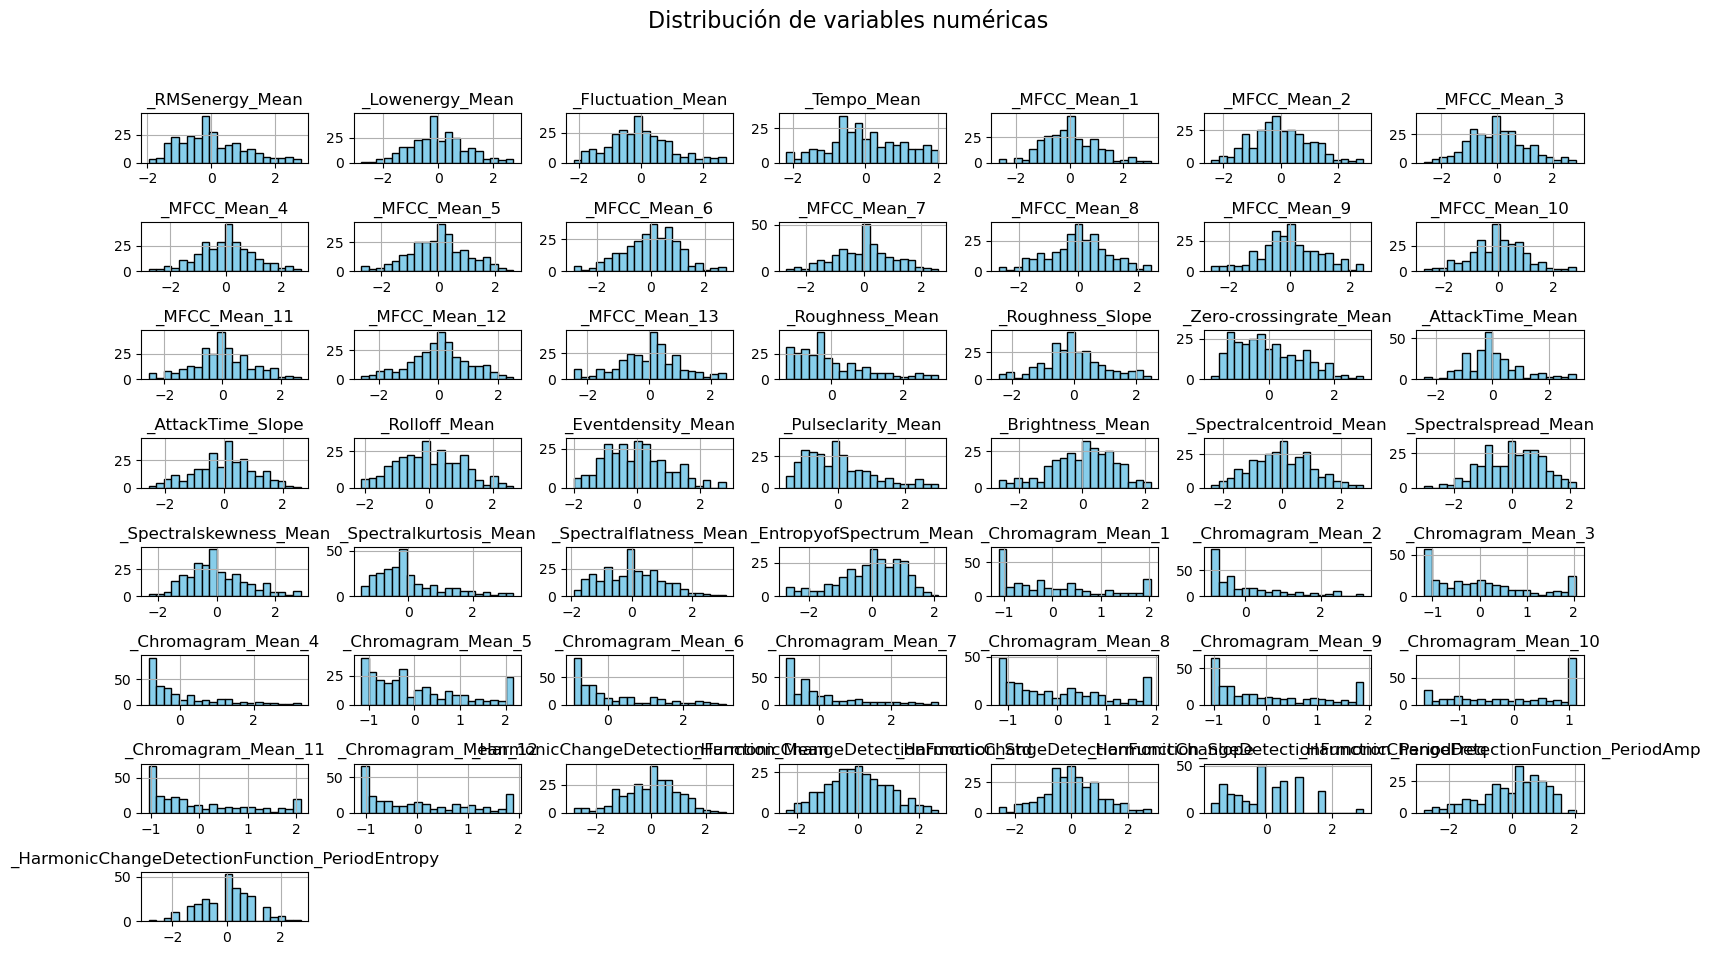


Dispersión y posibles outliers (Boxplots)


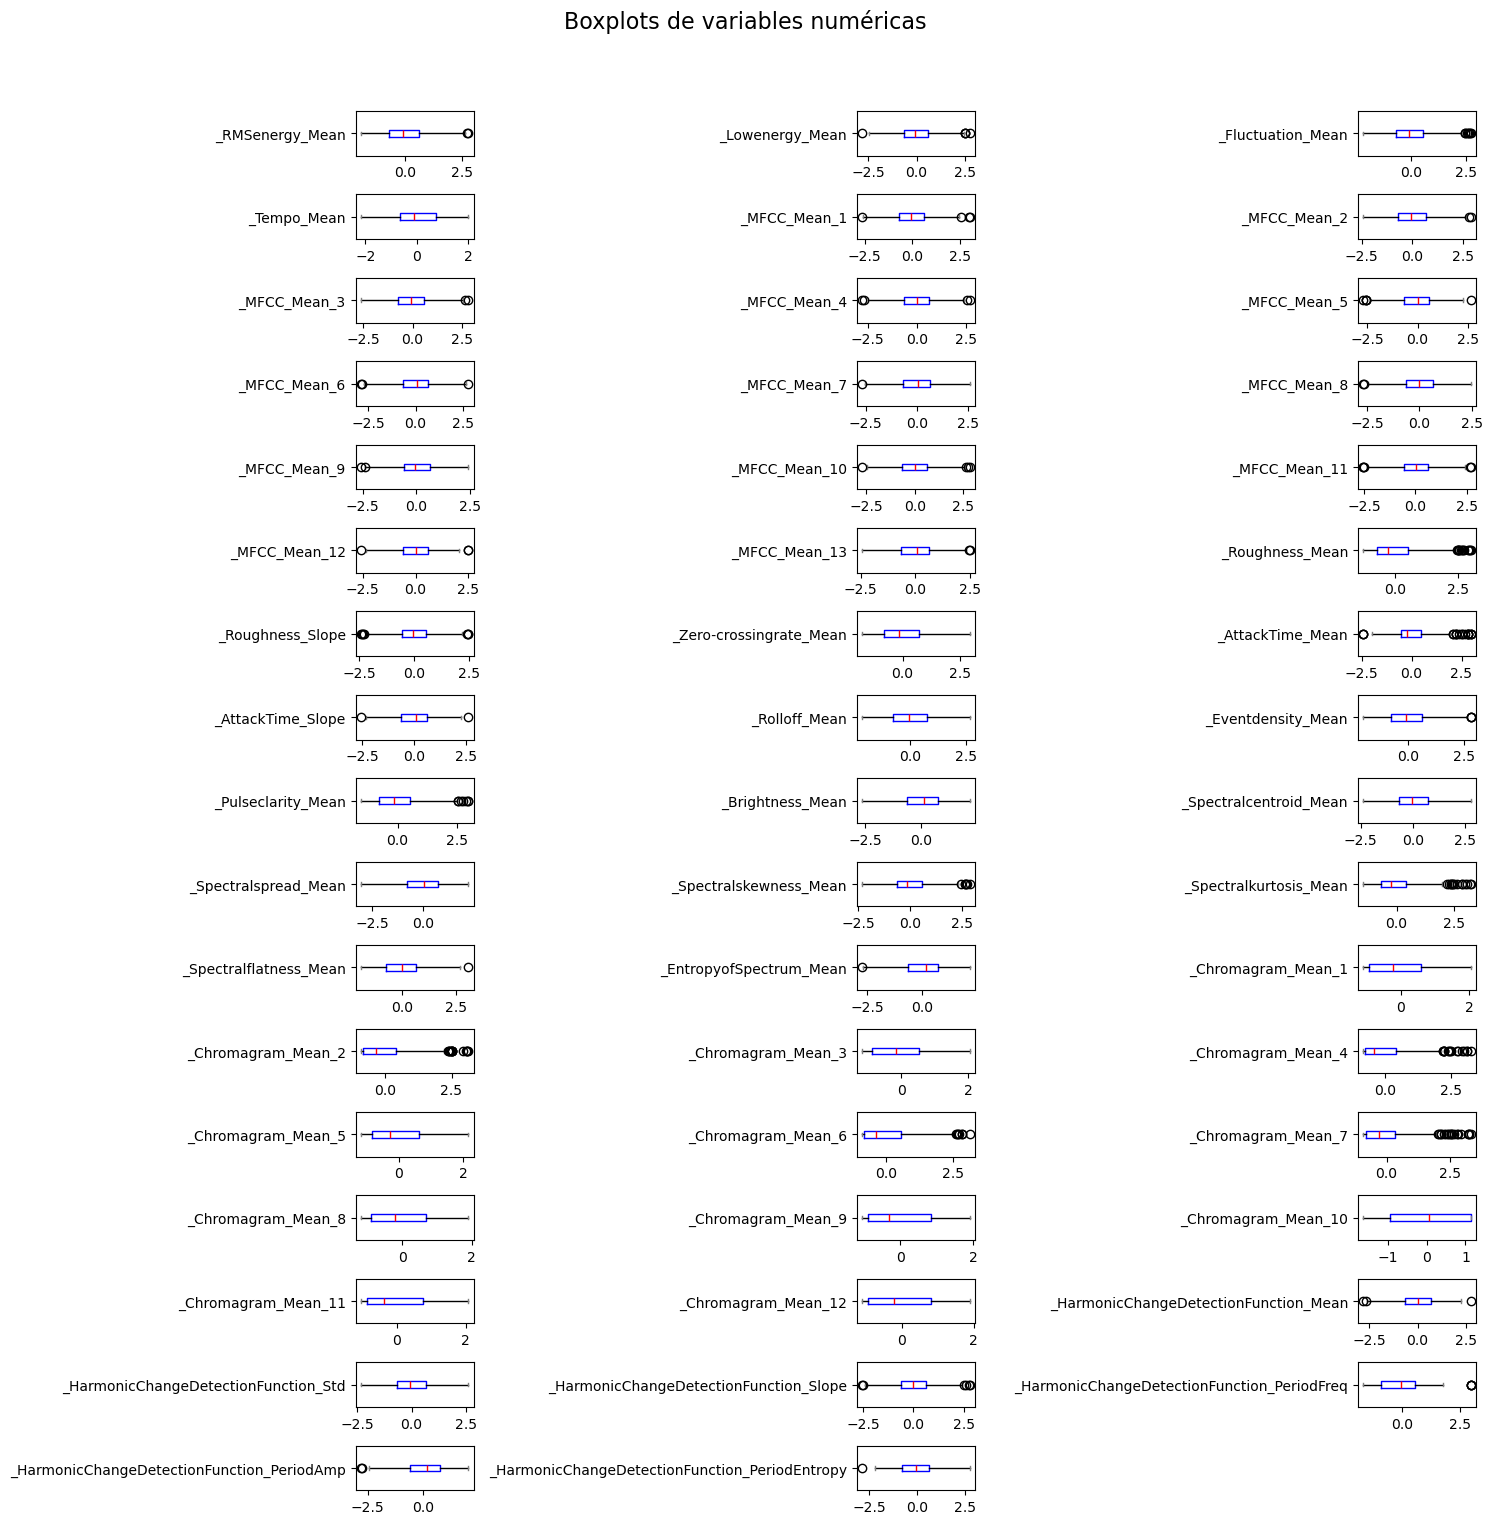

In [56]:
# Revisar de nuevo las distribuciones después de realizar el preprocesamiento
plot_numeric_eda(df_preprocessed, bins=20)

### Estadística Descriptiva

In [58]:
df_preprocessed.describe().T

count          mean       std  \
_RMSenergy_Mean                                 280.0 -8.881784e-17  1.001791   
_Lowenergy_Mean                                 280.0 -3.869920e-16  1.001791   
_Fluctuation_Mean                               280.0 -1.490871e-16  1.001791   
_Tempo_Mean                                     280.0 -2.188725e-16  1.001791   
_MFCC_Mean_1                                    280.0  6.026925e-17  1.001791   
_MFCC_Mean_2                                    280.0  1.903239e-17  1.001791   
_MFCC_Mean_3                                    280.0  1.427430e-16  1.001791   
_MFCC_Mean_4                                    280.0  4.758099e-18  1.001791   
_MFCC_Mean_5                                    280.0 -5.709718e-17  1.001791   
_MFCC_Mean_6                                    280.0  3.172066e-17  1.001791   
_MFCC_Mean_7                                    280.0  8.088768e-17  1.001791   
_MFCC_Mean_8                                    280.0  3.489272e-17  1.001791   
_MFCC_Mean_9                                    280.0  6.344132e-18  1.001791   
_MFCC_Mean_10                                   280.0 -3.172066e-17  1.001791   
_MFCC_Mean_11                                   280.0 -6.344132e-18  1.001791   
_MFCC_Mean_12                                   280.0 -6.344132e-18  1.001791   
_MFCC_Mean_13                                   280.0 -3.330669e-17  1.001791   
_Roughness_Mean                                 280.0  5.709718e-17  1.001791   
_Roughness_Slope                                280.0 -1.903239e-17  1.001791   
_Zero-crossingrate_Mean                         280.0 -3.362390e-16  1.001791   
_AttackTime_Mean                                280.0  5.487674e-16  1.001791   
_AttackTime_Slope                               280.0  1.268826e-17  1.001791   
_Rolloff_Mean                                   280.0  2.727977e-16  1.001791   
_Eventdensity_Mean                              280.0  3.489272e-17  1.001791   
_Pulseclarity_Mean                              280.0 -1.998401e-16  1.001791   
_Brightness_Mean                                280.0  2.030122e-16  1.001791   
_Spectralcentroid_Mean                          280.0 -3.489272e-16  1.001791   
_Spectralspread_Mean                            280.0  1.649474e-16  1.001791   
_Spectralskewness_Mean                          280.0 -1.681195e-16  1.001791   
_Spectralkurtosis_Mean                          280.0  2.632815e-16  1.001791   
_Spectralflatness_Mean                          280.0 -2.854859e-16  1.001791   
_EntropyofSpectrum_Mean                         280.0 -2.504346e-15  1.001791   
_Chromagram_Mean_1                              280.0  1.522592e-16  1.001791   
_Chromagram_Mean_2                              280.0 -1.268826e-17  1.001791   
_Chromagram_Mean_3                              280.0 -7.295751e-17  1.001791   
_Chromagram_Mean_4                              280.0 -6.344132e-17  1.001791   
_Chromagram_Mean_5                              280.0 -2.696256e-17  1.001791   
_Chromagram_Mean_6                              280.0 -6.344132e-17  1.001791   
_Chromagram_Mean_7                              280.0  3.489272e-17  1.001791   
_Chromagram_Mean_8                              280.0 -1.506731e-17  1.001791   
_Chromagram_Mean_9                              280.0  0.000000e+00  1.001791   
_Chromagram_Mean_10                             280.0 -9.198991e-17  1.001791   
_Chromagram_Mean_11                             280.0 -3.806479e-17  1.001791   
_Chromagram_Mean_12                             280.0  2.854859e-17  1.001791   
_HarmonicChangeDetectionFunction_Mean           280.0  1.268826e-17  1.001791   
_HarmonicChangeDetectionFunction_Std            280.0  3.108624e-16  1.001791   
_HarmonicChangeDetectionFunction_Slope          280.0  7.930164e-19  1.001791   
_HarmonicChangeDetectionFunction_PeriodFreq     280.0 -1.443290e-16  1.001791   
_HarmonicChangeDetectionFunction_PeriodAmp      280.0  6.471014e-16  1.001791  

### Curtosis

In [60]:
# Forma (curtosis)
kurt_values = df_preprocessed.kurt(numeric_only=True).sort_values(ascending=False)
kurt_values

_Chromagram_Mean_7                                1.372949
_AttackTime_Mean                                  1.039346
_Chromagram_Mean_4                                1.038897
_Spectralkurtosis_Mean                            0.968912
_Chromagram_Mean_2                                0.904324
_Roughness_Mean                                   0.709097
_Chromagram_Mean_6                                0.489345
_Pulseclarity_Mean                                0.440536
_MFCC_Mean_1                                      0.386886
_MFCC_Mean_10                                     0.242123
_Fluctuation_Mean                                 0.188687
_HarmonicChangeDetectionFunction_Slope            0.188305
_MFCC_Mean_6                                      0.164794
_MFCC_Mean_4                                      0.138146
_MFCC_Mean_13                                     0.120064
_Spectralskewness_Mean                            0.104625
_EntropyofSpectrum_Mean                           0.1022

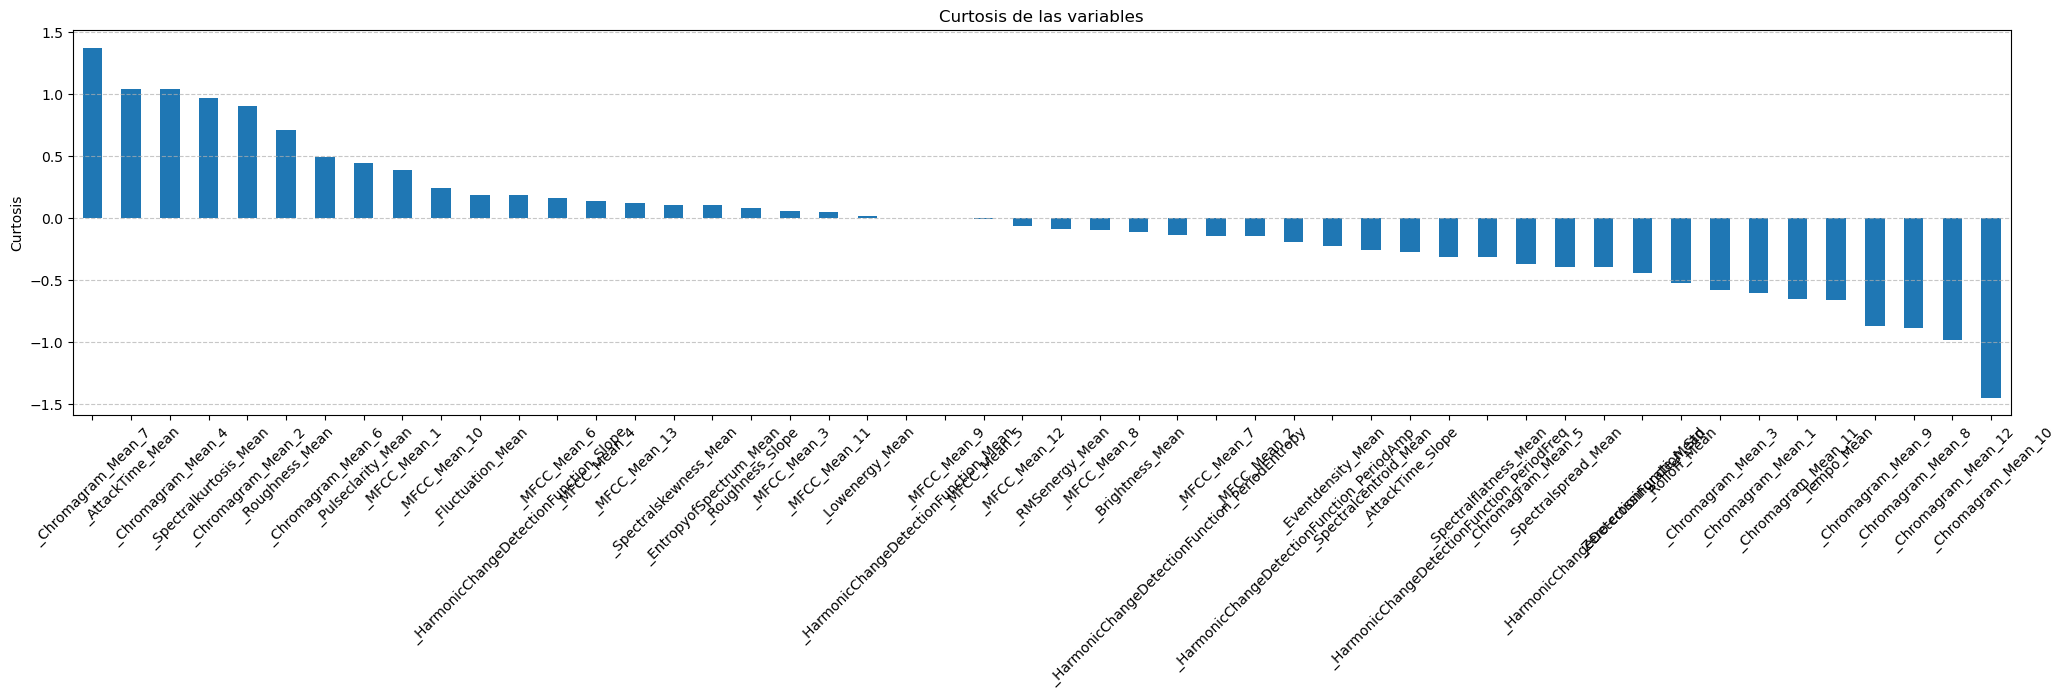

In [61]:
kurt_values.plot(kind='bar', figsize=(25,5))
plt.title("Curtosis de las variables")
plt.ylabel("Curtosis")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Casi todas las variables están entre -0.5 y +0.5, lo cual indica distribuciones relativamente planas o normales.
- Las columnas con los cronogramas y los espectrales indican una distribución más puntiaguda y más chata respectivamente. Es decir, son las columnas que corresponden los extremos.
- Al no ser tan grande la curtosis, nos confirma que la eliminación de outliers fue efectiva, ya que las colas extremas (que elevan la curtosis) se redujeron.

### Asimetría

In [64]:
skew_values = df_preprocessed.skew(numeric_only=True).sort_values(ascending=False)
skew_values

_Chromagram_Mean_7                                1.408916
_Chromagram_Mean_4                                1.374750
_Chromagram_Mean_2                                1.295649
_Chromagram_Mean_6                                1.206680
_Spectralkurtosis_Mean                            1.180801
_Roughness_Mean                                   1.137850
_Pulseclarity_Mean                                0.963502
_Chromagram_Mean_5                                0.840726
_AttackTime_Mean                                  0.808465
_Chromagram_Mean_11                               0.791615
_Chromagram_Mean_1                                0.735718
_Chromagram_Mean_9                                0.722598
_Chromagram_Mean_3                                0.678705
_Chromagram_Mean_12                               0.598766
_RMSenergy_Mean                                   0.588139
_Spectralskewness_Mean                            0.574173
_Chromagram_Mean_8                                0.5585

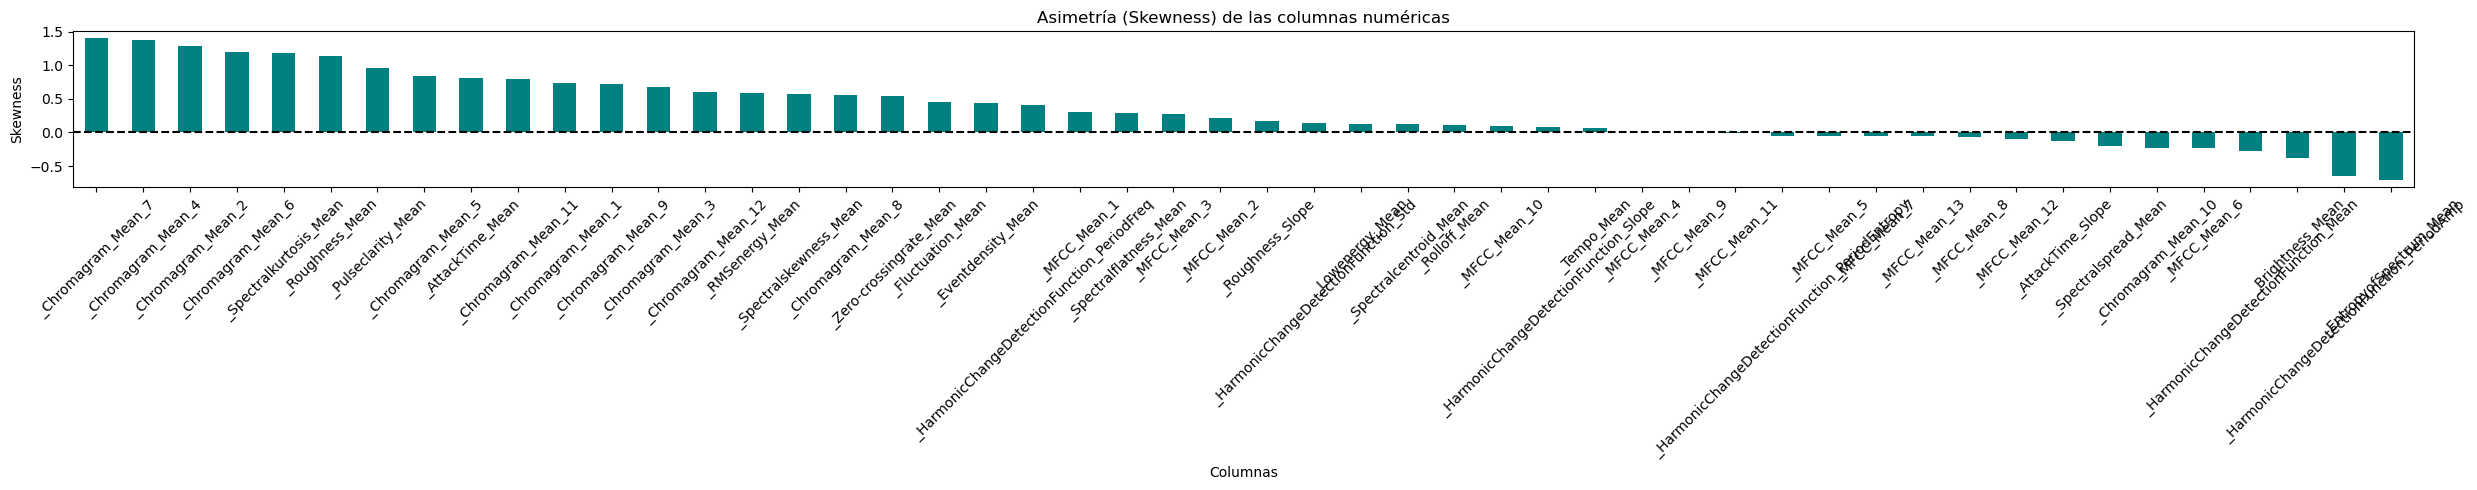

In [65]:
# Graficar
plt.figure(figsize=(25, 5))
skew_values.plot(kind='bar', color='teal')

plt.title('Asimetría (Skewness) de las columnas numéricas')
plt.xlabel('Columnas')
plt.ylabel('Skewness')
plt.axhline(0, color='black', linestyle='--')  # línea de referencia en 0
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La asimetría mide qué tan simétrica es la distribución de los datos en comparación con una distribución normal:

- skew = 0: distribución perfectamente simétrica.
- skew > 0: cola más larga a la derecha (asimetría positiva).
- skew < 0: cola más larga a la izquierda (asimetría negativa).
- Las 15 primeras columnas presentan una cola a la derecha más pronunciada, y las últimas 3 un cola hacía la izquierda, esto se presenta incluso después de eliminar outliers, lo que sugiere distribuciones sesgadas hacia valores bajos y pocos valores altos.
- Las primers 6 columnas tienen un valor mayor a 1, lo que suele indicar alta asimetría, considerar aplicar transformaciones (por ejemplo, logarítmica, Box-Cox o PowerTransformer(method="yeo-johnson") de scikit-learn) para acercar la variable a una distribución normal.
- Las transformaciones estabilizan la varianza y reduce la asimetría.

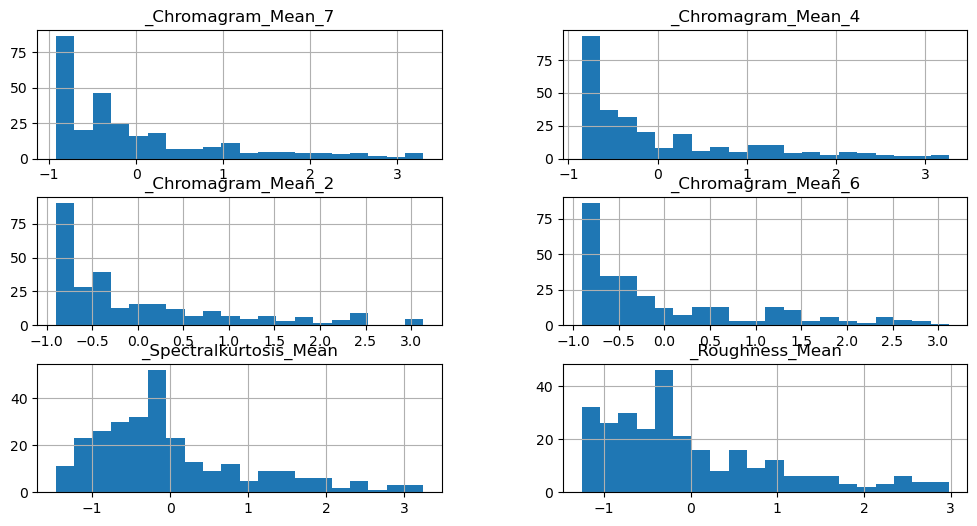

In [67]:
cols_skewed = df_preprocessed.skew(numeric_only=True).sort_values(ascending=False).head(6).index
df_preprocessed[cols_skewed].hist(figsize=(12,6), bins=20)
plt.show()

## **Parte 3**. Análisis de correlación (bivariante y multivariante)

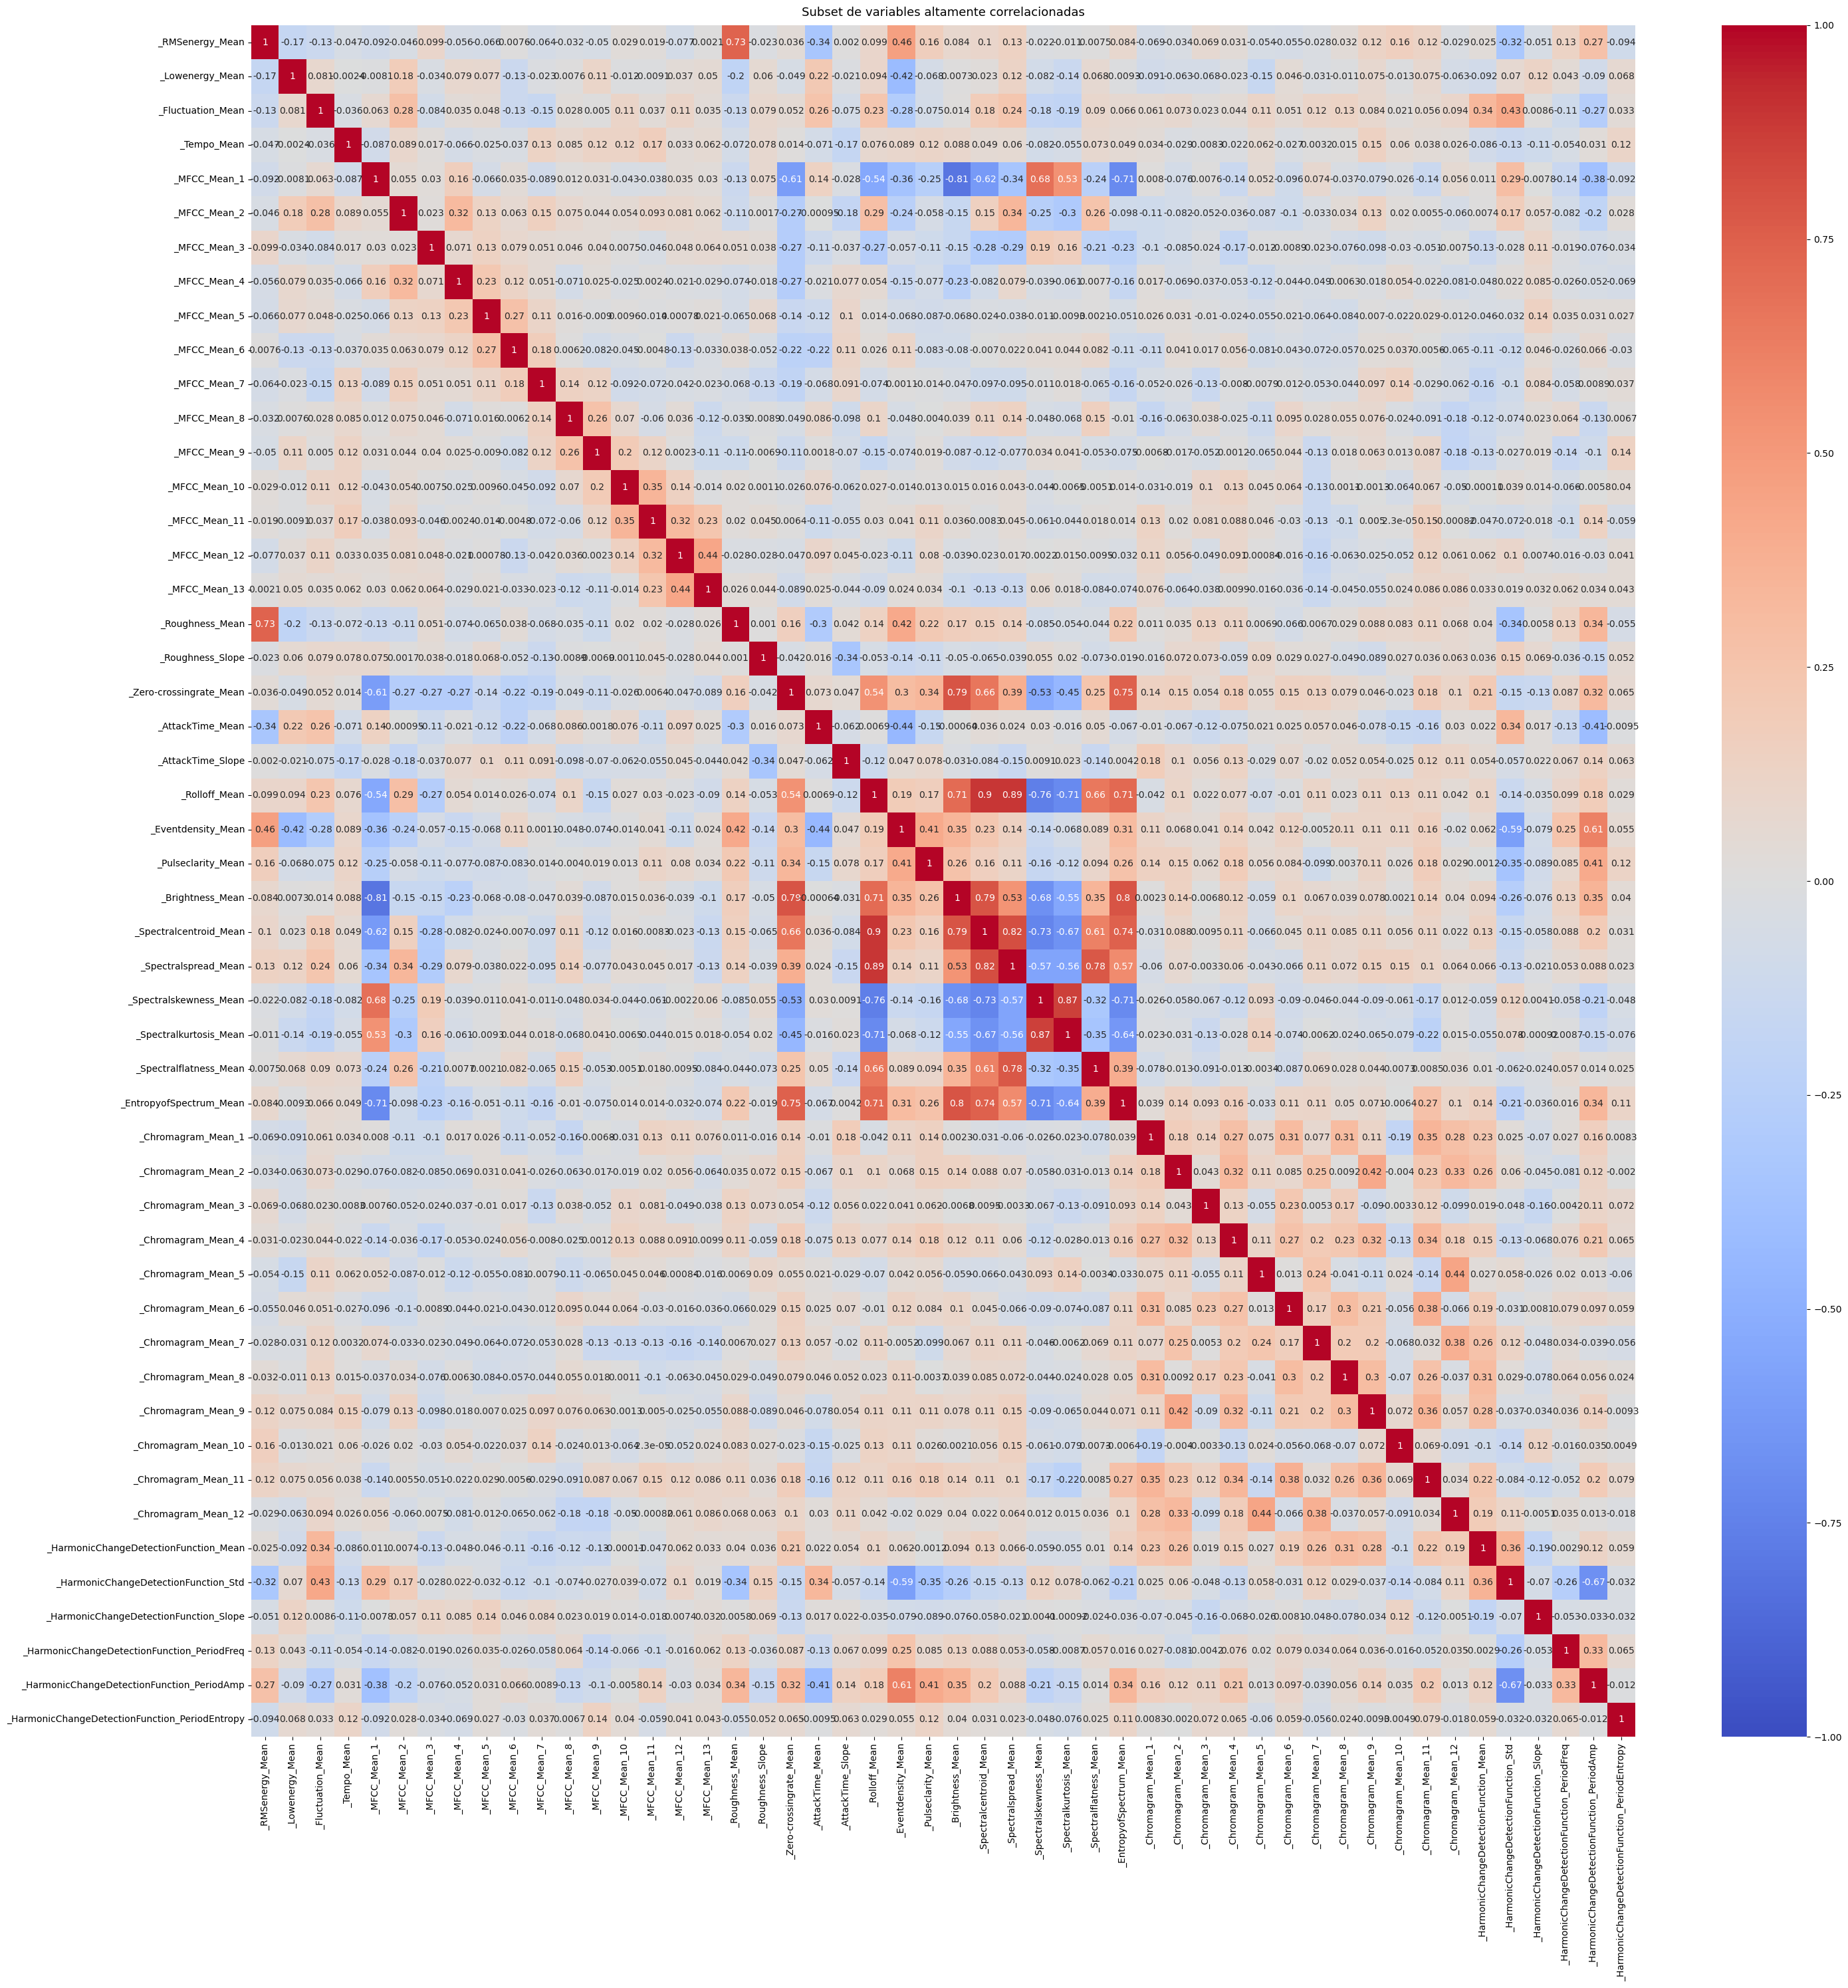

In [69]:
corr_matrix = df_preprocessed.drop(columns=["Class"]).corr()

# Gráfico
plt.figure(figsize=(30, 30))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    vmin=-1, vmax=1,
)
plt.title("Subset de variables altamente correlacionadas", fontsize=13, pad=10)
plt.tight_layout()
plt.show()

- Los promedios de los cronogramas tienden a tener correlaciones más altas entre ellos, indicando que algunas piezas musicales se relacionan entre sí, lo cual puede parecer 'lógico' hasta cierto punto, pero es interesante observarlo en la gráfica.
- Las otras variables más destacadas, son los 'espectros', que se relacionan con varibles 'intrínsecas a ellas', es decir, que miden la forma de este o influyen en él, como por ejemplo el brillo.

> MFCC stands for Mel-Frequency Cepstral Coefficients, which are a set of features used to represent audio signals for tasks like speech recognition and speaker identification

- La variable 'MFCC_mean_1'tiene una relación negativa muy fuerte con el promedio del brillo y con la entropía del espectro, lo cual, puede indicar que son señales muy suceptibles a los valores que las corresponde, tal vez, son señales 'sucias' o mal tomadas, ya que de todos los 'MFCC', es la única que muestra una correlación negativa tan fuerte, por lo que nos hace cuestionarnos la calida del dato.

In [71]:
# Filtrar la mitad superior de la matriz (para no repetir pares)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_upper = corr_matrix.where(~mask)

# Convertir a formato largo (tidy)
high_corr_df = (
    corr_upper.stack()
    .reset_index()
    .rename(columns={'level_0': 'Variable_1', 'level_1': 'Variable_2', 0: 'Correlation'})
)

# Filtrar correlaciones absolutas mayores o iguales a 0.7
threshold = 0.7
high_corr_df = high_corr_df.loc[high_corr_df['Correlation'].abs() >= threshold]

# Ordenar por magnitud de correlación
high_corr_df = high_corr_df.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

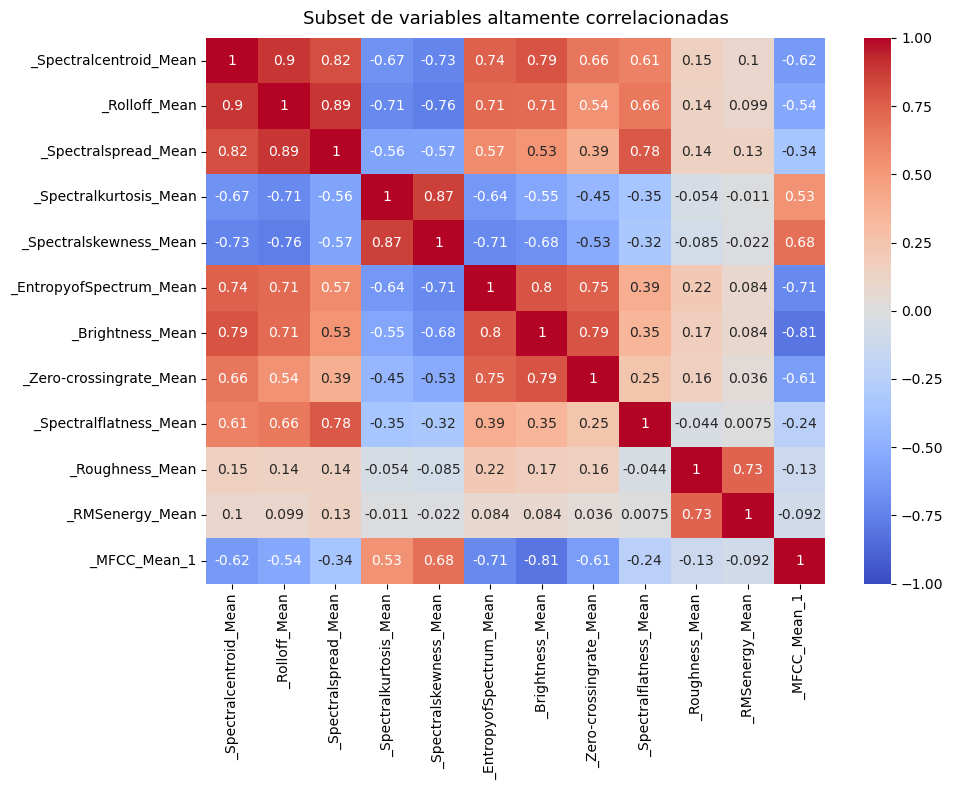

In [72]:
# Conjunto único de todas las variables implicadas
high_corr_vars = pd.unique(
    high_corr_df[['Variable_1', 'Variable_2']].values.ravel()
)

# Submatriz de correlación sólo con esas variables
subset_corr = df_preprocessed[high_corr_vars].corr()

# Gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(
    subset_corr,
    annot=True,
    cmap="coolwarm",
    center=0,
    vmin=-1, vmax=1,
)
plt.title("Subset de variables altamente correlacionadas", fontsize=13, pad=10)
plt.tight_layout()
plt.show()

- Hay varias variables midiendo la forma del espectro, por eso se correlacionan tanto.

### Box plots respecto a la varible categórica 'Class'
- El objetivo es ver como se relacionan con las columnas con la variable predictora. Y podemos observar que no hay muchos datos fuera de lo común, 'outliers'.
- Una vez más, vale la pena ver los box plots respecto a las columnas cromáticas, hay variedad de 'outliers' (en unas columnas muchas y en otros ninguna), y es donde podemos encontrar una mayor representación de los cuartiles.
- Sin duda apuntan a ser variables importantes en la predicción.

In [75]:
def plot_boxplots_by_class(df, target_col="Class", n_cols=3, max_plots=9):
    """
    Genera boxplots de todas las columnas numéricas respecto a una variable categórica.
    Compatible con seaborn >= 0.13.2
    """
    # Selecciona columnas numéricas
    num_cols = df.select_dtypes(include=['number']).columns.tolist()
    n_rows = (max_plots + n_cols - 1) // n_cols

    for i in range(0, len(num_cols), max_plots):
        subset_cols = num_cols[i:i+max_plots]
        fig, axes = plt.subplots(
            nrows=n_rows,
            ncols=n_cols,
            figsize=(6*n_cols, 4*n_rows)
        )
        axes = axes.flatten()

        for ax, col in zip(axes, subset_cols):
            sns.boxplot(
                data=df,
                x=target_col,
                y=col,
                hue=target_col,        # Agregado para compatibilidad
                palette="Set2",
                legend=False,          # Evita mostrar leyenda redundante
                ax=ax
            )
            ax.set_title(col, fontsize=11)
            ax.set_xlabel("")
            ax.set_ylabel("")
            ax.tick_params(axis='x', rotation=30)
        
        # Oculta ejes vacíos
        for ax in axes[len(subset_cols):]:
            ax.set_visible(False)

        plt.tight_layout()
        plt.show()

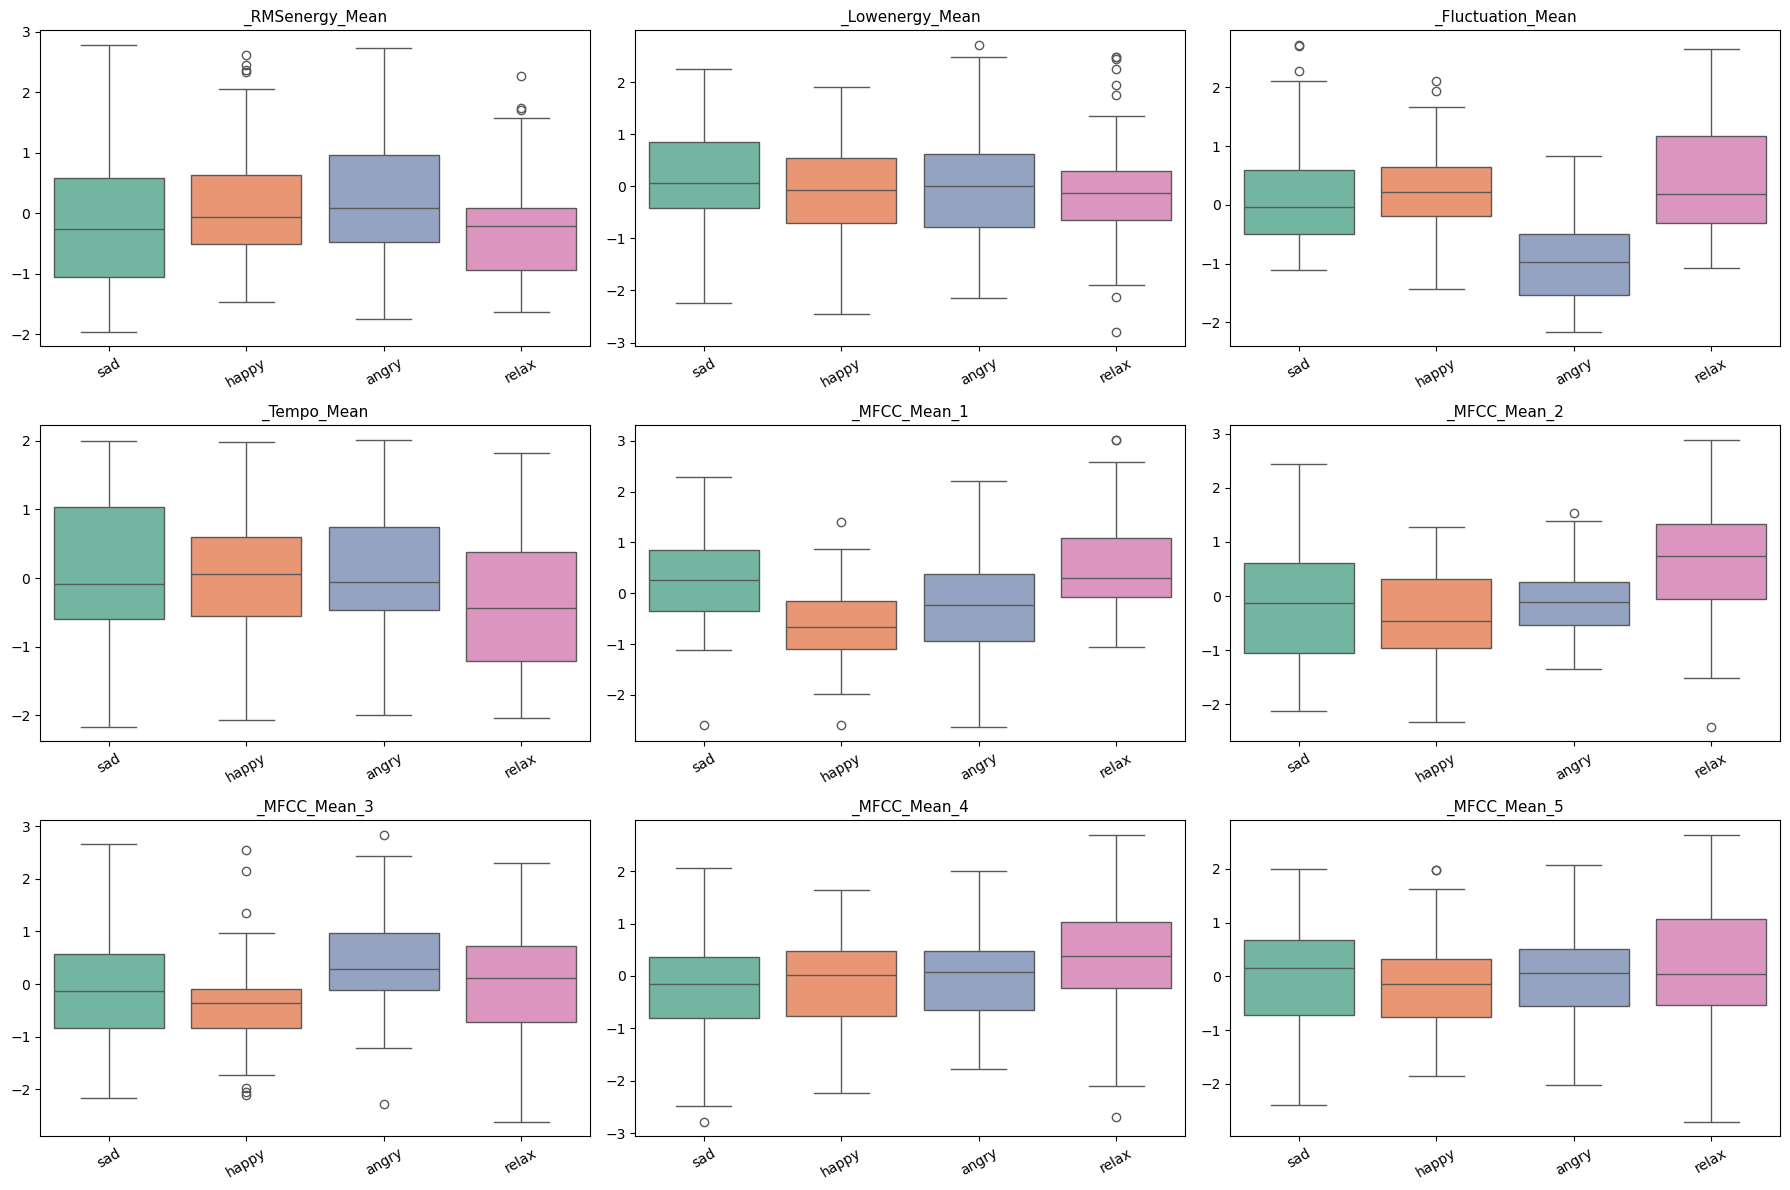

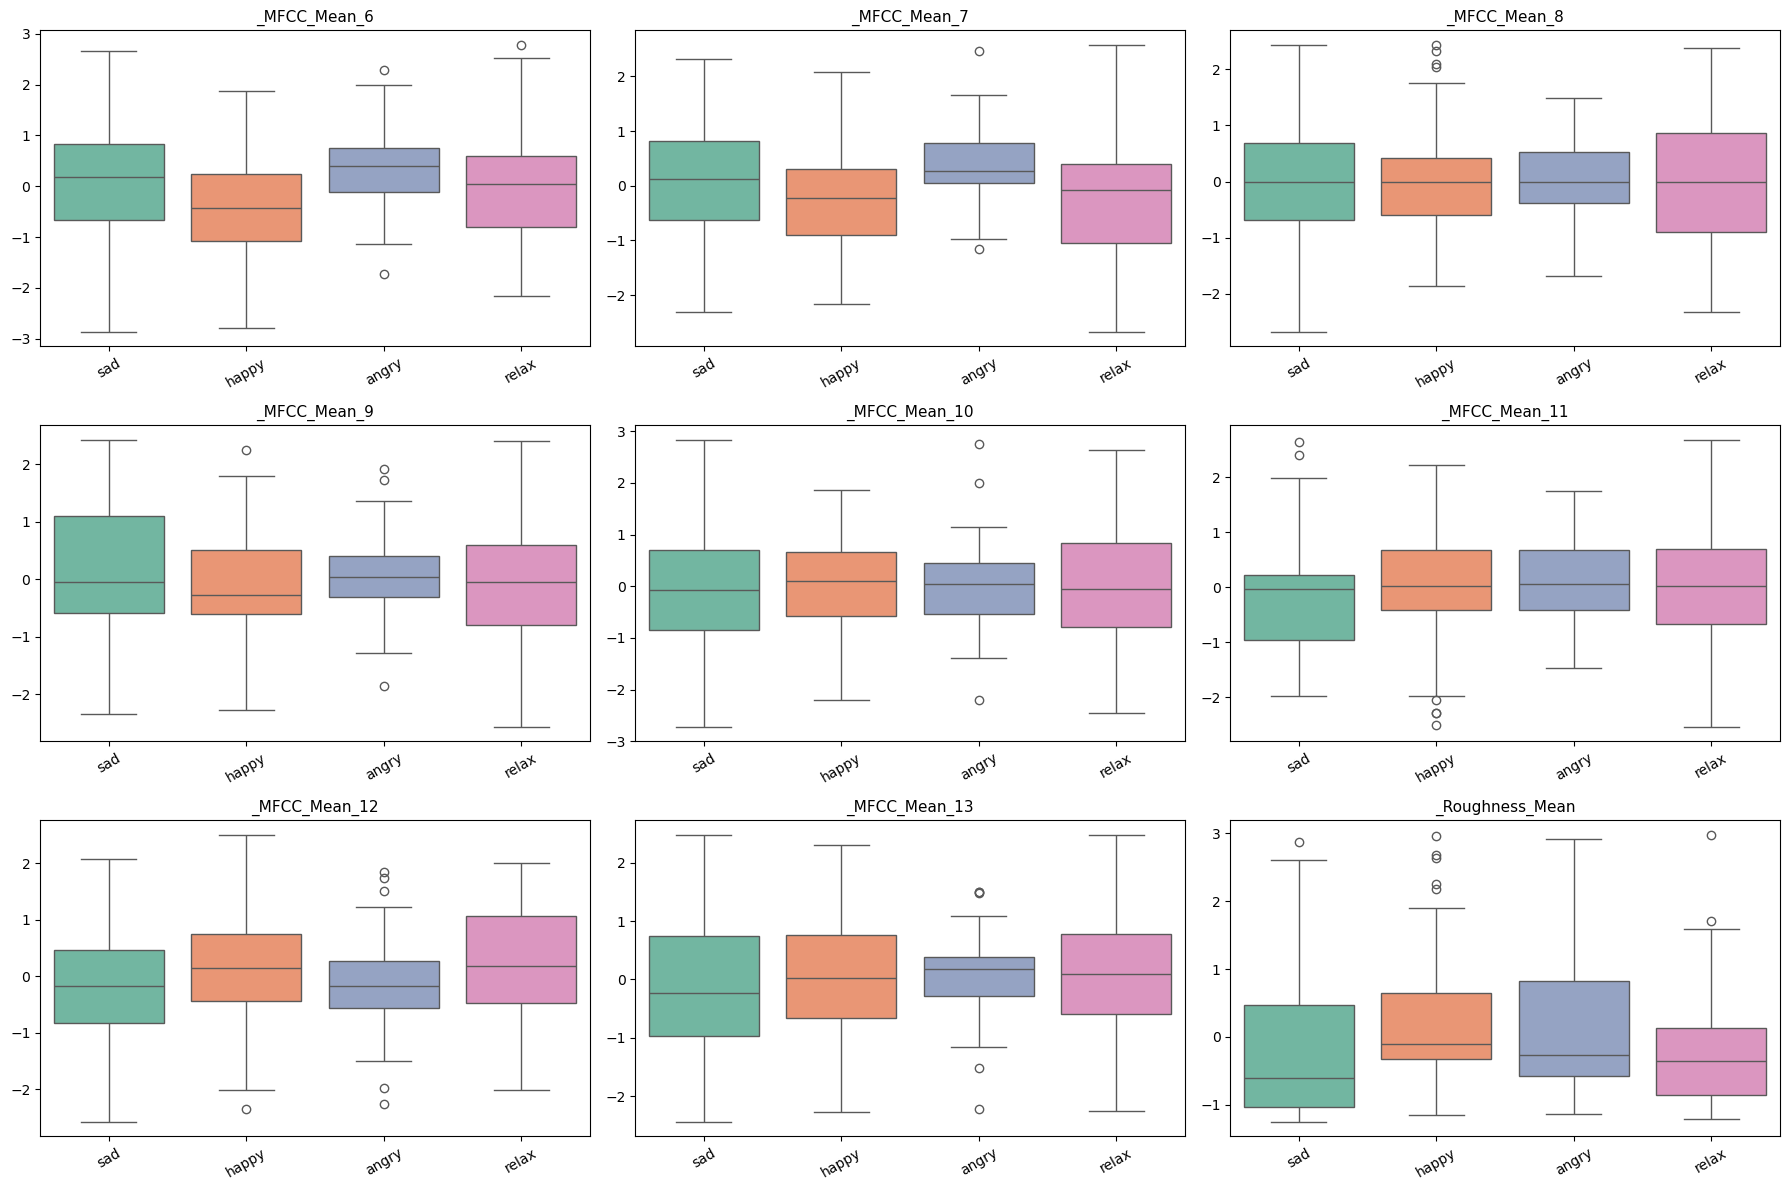

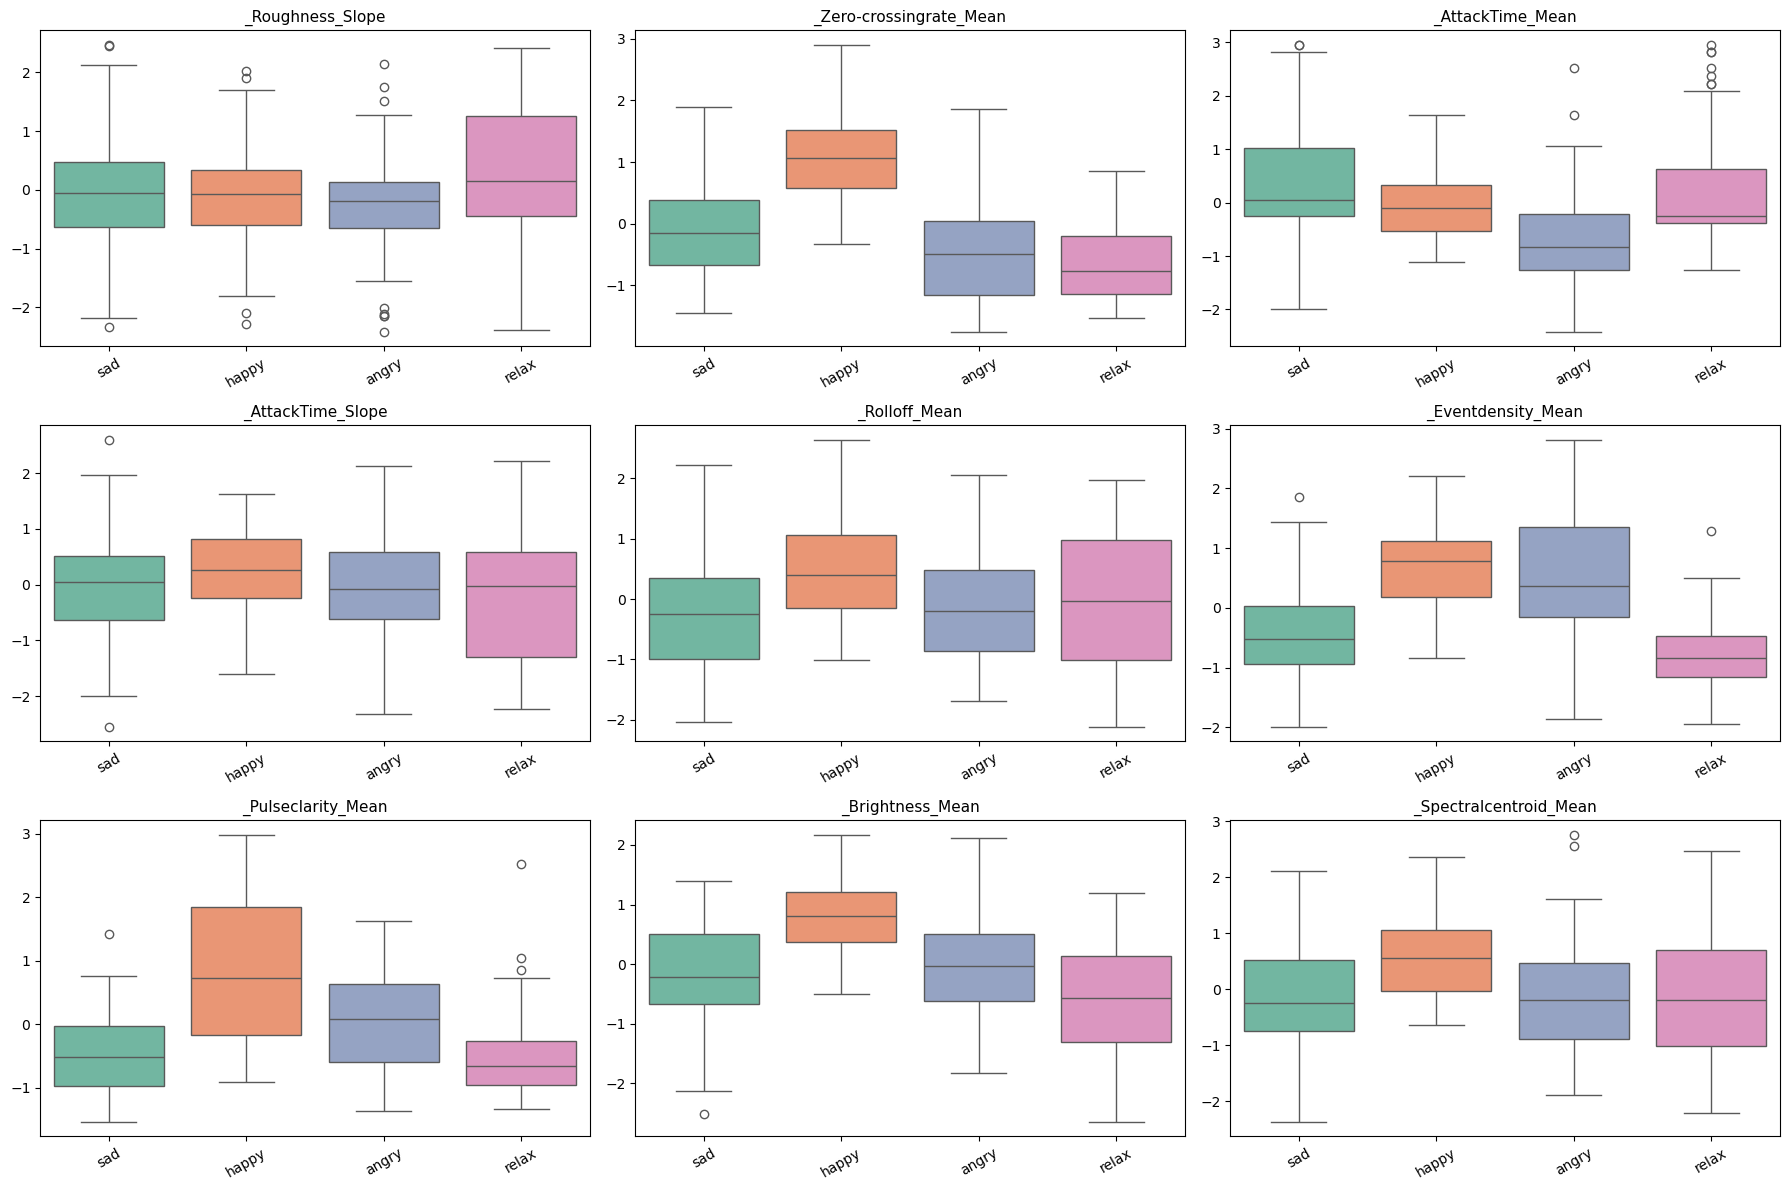

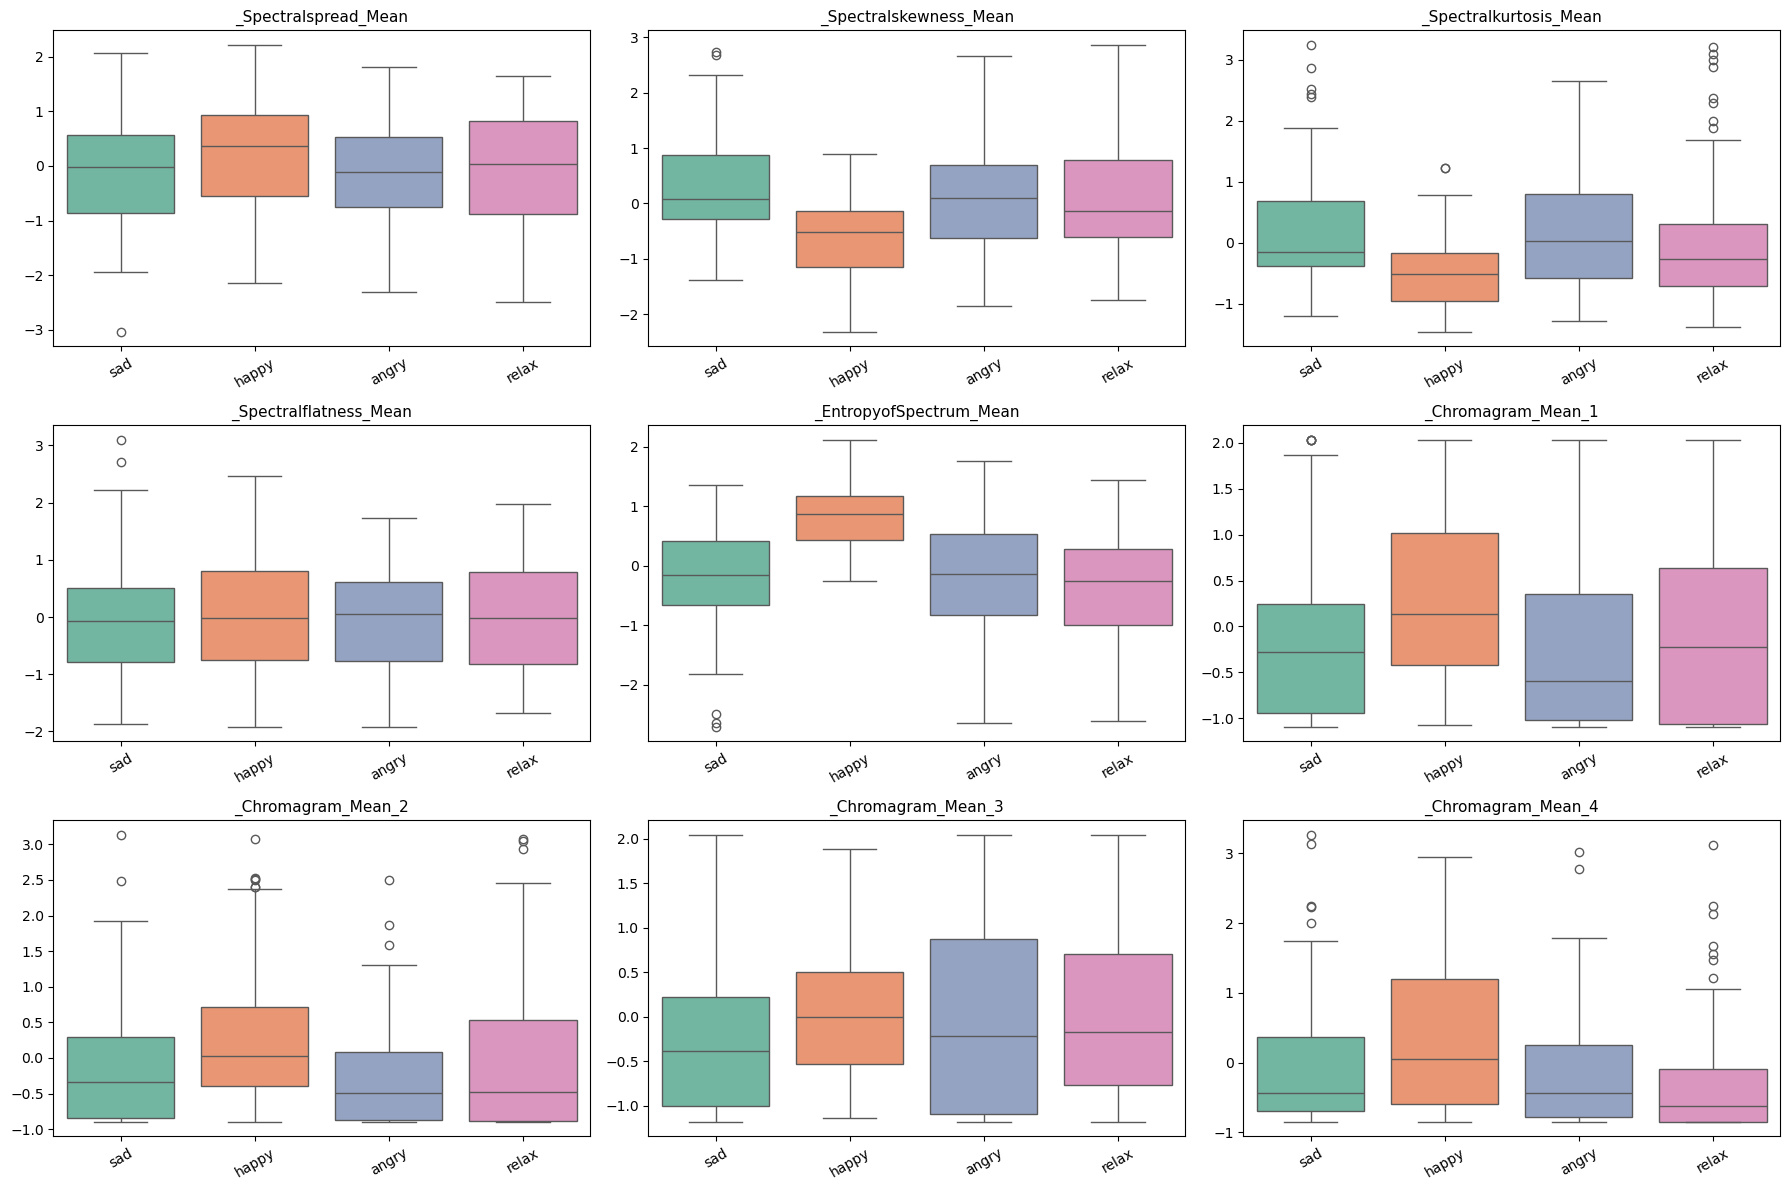

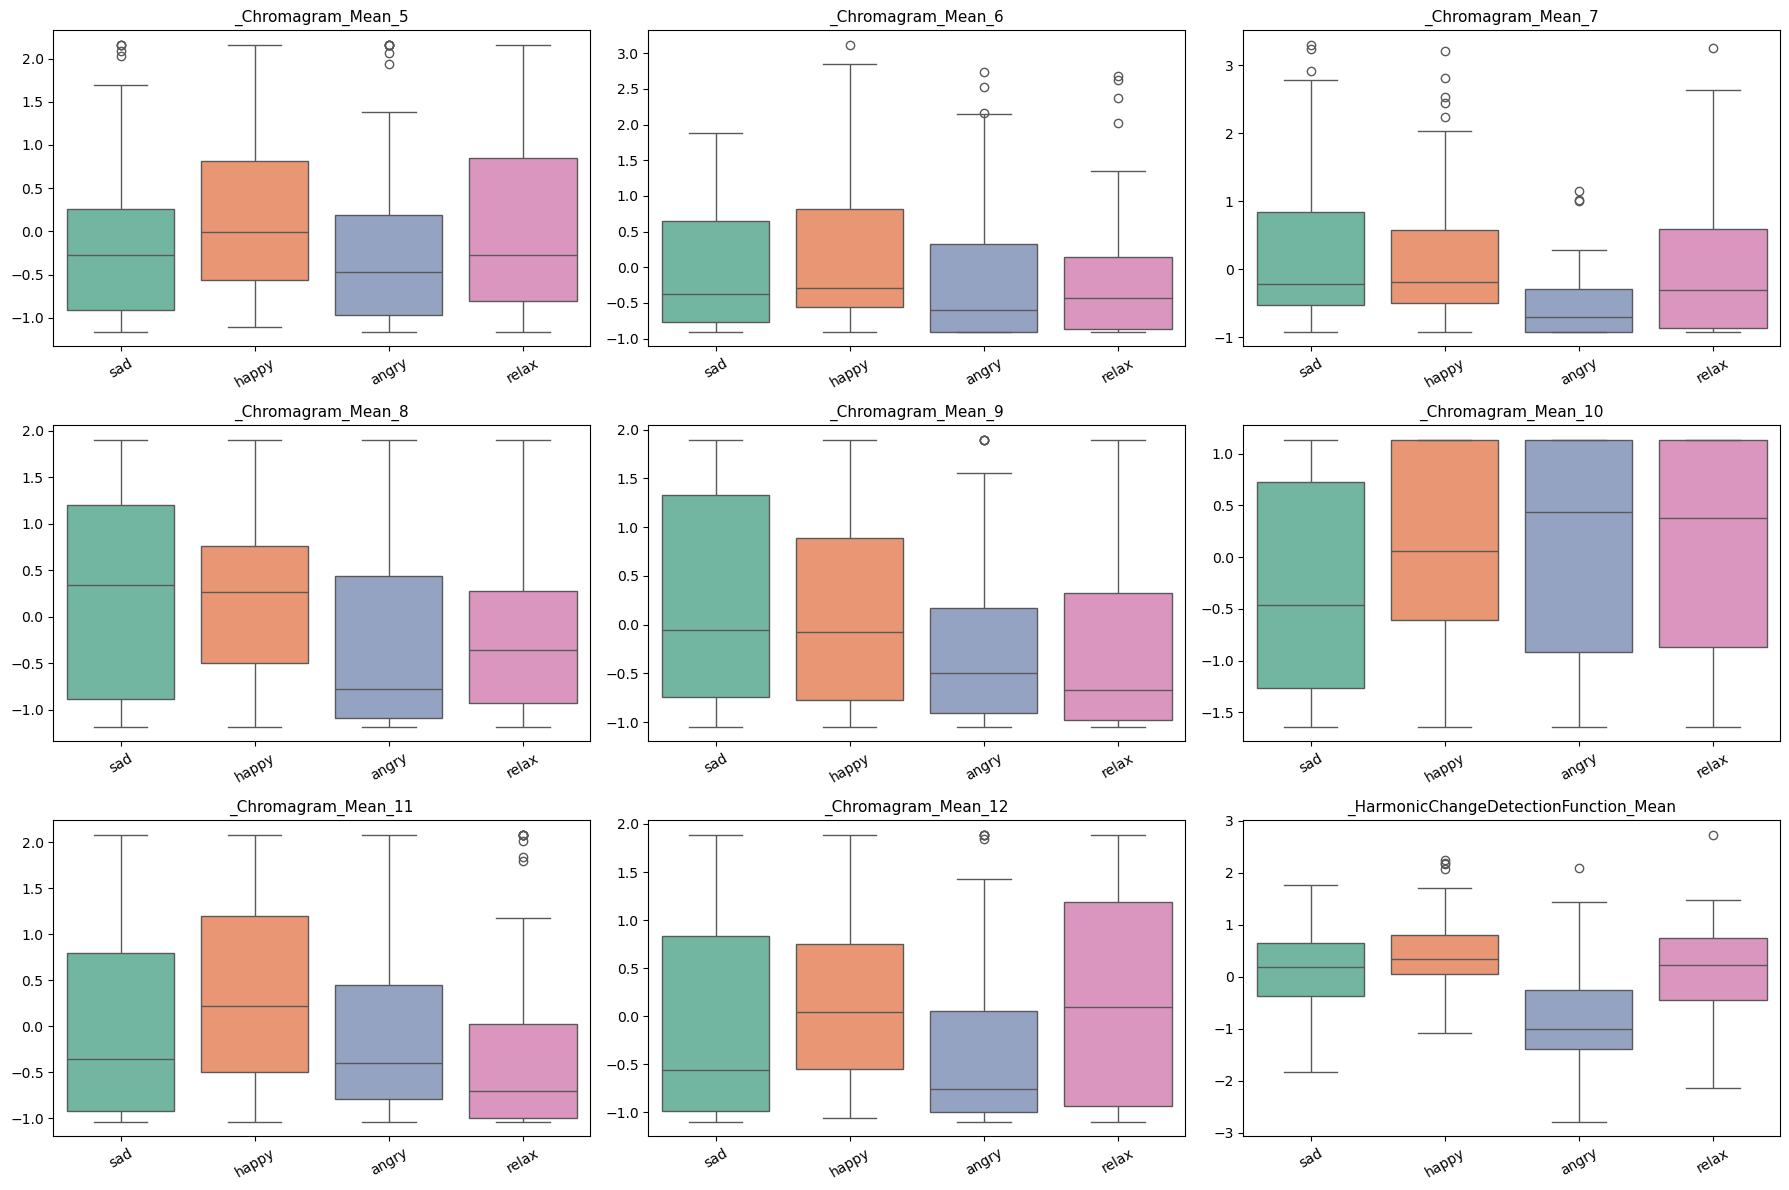

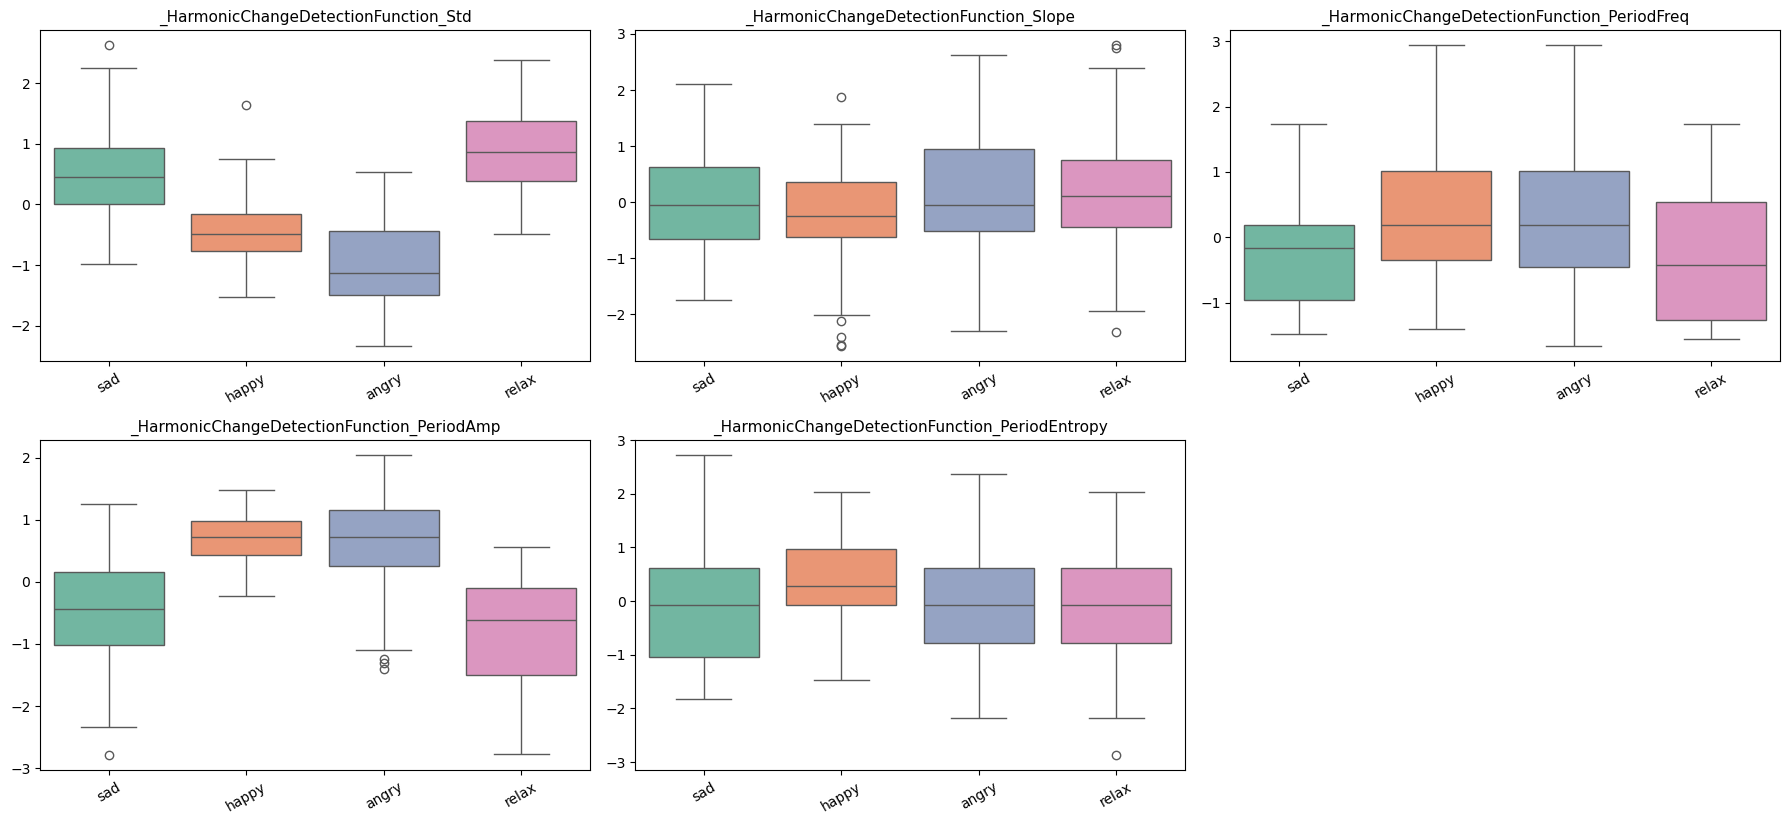

In [76]:
plot_boxplots_by_class(df_preprocessed, target_col="Class", n_cols=3, max_plots=9)

### Diagramas de dispersión
- Un gráfico que tampoco podemos dejar pasar es el de puntos.
- Dicidimos usarlo con algunos cronogramas para ver su comportamiento, incluso lo probamos con la clase objetivo, cuyo resultado es interesante, ya que todos están alineados con una clase, lo que nos dice que efectivamente las imágenes corresponde a una música en croncreto.

In [78]:
def _generate_scatter_plot(x_label:str, y_label:str):
    plt.scatter(df_preprocessed[x_label], df_preprocessed[y_label])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Diagrama de dispersión entre {x_label} y {y_label}')
    plt.grid(True)
    plt.show()

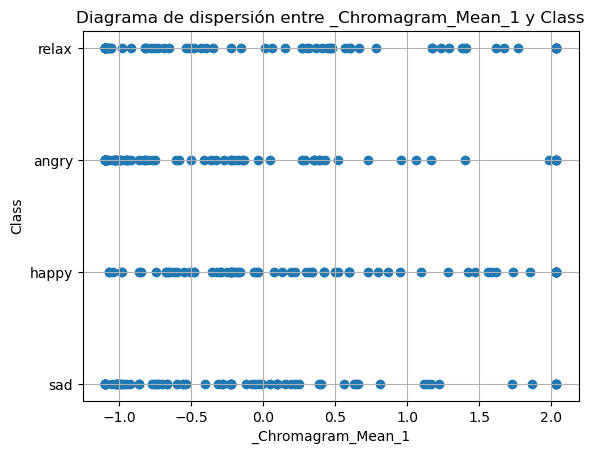

In [79]:
_generate_scatter_plot("_Chromagram_Mean_1", 'Class')

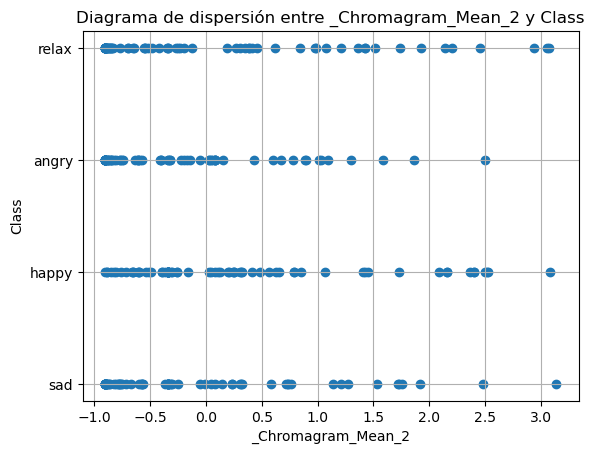

In [80]:
_generate_scatter_plot("_Chromagram_Mean_2", 'Class')

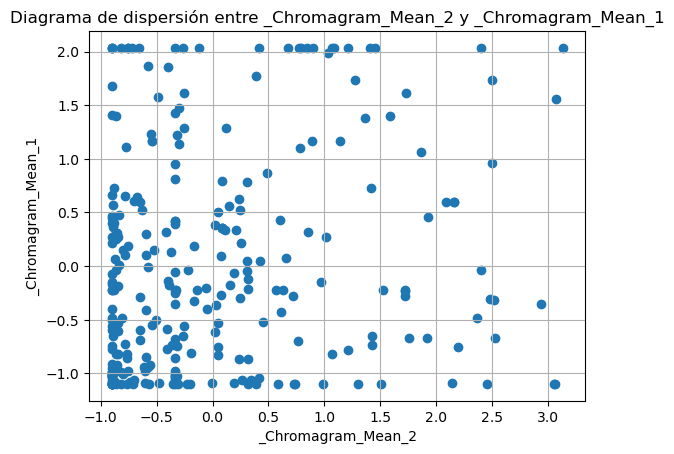

In [81]:
_generate_scatter_plot("_Chromagram_Mean_2", '_Chromagram_Mean_1')

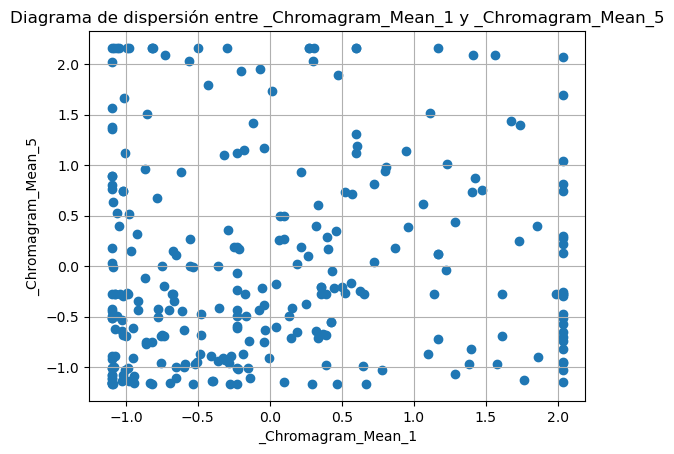

In [82]:
_generate_scatter_plot("_Chromagram_Mean_1", '_Chromagram_Mean_5')

## **Parte 4**. Preprocesamiento: Outliers -> SimpleImputer -> PowerTransformer -> StandardScaler -> PCA

In [84]:
# Pipeline para imputar con la mediana, transformación yeo-johnson y estandarización z-score.
full_numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("power", PowerTransformer(method="yeo-johnson")),
    ("scaler", StandardScaler())
])

# Combinación final
full_preprocessor = ColumnTransformer(
    transformers=[
        ("num", full_numeric_pipeline, numeric_cols)
    ],
    remainder='passthrough' # deja pasar el resto tal cual (ej. categóricas ya codificadas)
)

In [85]:
# Aplicar pipeline de preprocesamiento
X_full_preprocessed = full_preprocessor.fit_transform(X_train)

# Obtener los nombres de las features de la salida del ColumnTransformer
full_feature_names = full_preprocessor.get_feature_names_out()

# Reconstruir dataframe con nombres de columnas
X_full_preprocessed = pd.DataFrame(X_full_preprocessed, columns=full_feature_names)

# Renombrar las columnas de X para limpiarlas
X_full_preprocessed.columns = [col.split('__')[1] for col in X_full_preprocessed.columns]

# X procesada sin Y original
X_full_preprocessed

_RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
0           0.123314        -0.180493           0.654982    -0.412951   
1           1.667159        -0.990727           0.307003    -0.153877   
2           1.826164        -1.381960          -2.062322     0.747849   
3          -0.230444        -0.653679           0.016271     0.129280   
4          -0.418698         1.533637           0.885697     1.731738   
..               ...              ...                ...          ...   
275         0.877380        -0.110341          -0.823659     0.937494   
276         0.020244         2.344305          -0.251890    -1.374575   
277         1.246890        -0.297887          -1.741416     0.044901   
278        -2.507086         2.176067           0.642079     1.024371   
279        -1.684893         0.647536           0.450533    -1.653989   

     _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  \
0        0.924347      1.122195     -0.852475      1.377371     -0.712518   
1        0.171309     -0.676647     -0.765383     -1.496042     -0.269409   
2       -0.113421      0.183583      0.324540     -1.086769     -0.690450   
3       -0.149302     -1.527337     -0.512473     -0.222731      0.311890   
4        0.605565      0.772228     -0.569045      0.241207     -0.828219   
..            ...           ...           ...           ...           ...   
275      1.293424     -1.019973      0.227101     -0.063323      0.171634   
276      0.214979     -0.203856      0.557224      0.905555      1.012180   
277      0.121629     -0.547639     -0.781915      0.470593      0.531327   
278     -0.582450      2.266252     -1.700001      1.340020      2.029940   
279      0.779135      0.275555     -0.823362     -0.377528      0.694989   

     _MFCC_Mean_6  ...  _Chromagram_Mean_9  _Chromagram_Mean_10  \
0       -0.571060  ...            0.850792             1.156616   
1       -0.479571  ...           -0.199739            -0.797615   
2        0.709659  ...            1.228683             0.471227   
3       -0.046471  ...           -0.065984            -0.139252   
4       -1.522020  ...            0.197258            -0.571767   
..            ...  ...                 ...                  ...   
275     -0.433547  ...            1.227119             1.074663   
276     -0.088153  ...            1.056580            -0.818615   
277      1.113858  ...           -1.060839             1.156616   
278     -1.626628  ...           -0.279918            -1.271451   
279      0.384580  ...            0.033444             0.125527   

     _Chromagram_Mean_11  _Chromagram_Mean_12  \
0               1.435495            -0.567761   
1               0.082212             1.550148   
2               1.479436            -0.369424   
3               1.488492             0.087944   
4               0.645595            -1.233624   
..                   ...                  ...   
275            -0.585397            -1.274739   
276            -0.644786            -1.245309   
277            -0.391854            -1.119446   
278            -1.331177             0.408455   
279             1.614188             0.957910   

     _HarmonicChangeDetectionFunction_Mean  \
0                                -0.080253   
1                                -0.217299   
2                                 1.460103   
3                                 2.369879   
4                                -0.060527   
..                                     ...   
275                               0.590573   
276                               1.170575   
277                              -0.598960   
278                               1.460103   
279                               0.179099   

     _HarmonicChangeDetectionFunction_Std  \
0                                0.162753   
1                               -0.720734   
2                               -0.217031   
3                               -0.239624   
4                              

In [86]:
print("Transformaciones completadas.")
print(f"X_full_preprocessed shape: {X_full_preprocessed.shape}")

Transformaciones completadas.
X_full_preprocessed shape: (280, 50)


### Códificación de la variable objetivo

In [88]:
# Aplicar codificación a la variable objetivo (Class)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)

print(f"Clases codificadas: {list(label_encoder.classes_)}")

Clases codificadas: ['angry', 'happy', 'relax', 'sad']


In [89]:
# Resultado de variable objetivo codificada con LabelEncoder()
y_encoded

array([3, 1, 0, 1, 3, 0, 3, 0, 0, 2, 3, 2, 2, 2, 0, 1, 0, 1, 3, 1, 3, 1,
       3, 0, 3, 0, 1, 3, 3, 2, 2, 1, 0, 2, 0, 2, 0, 2, 3, 2, 1, 0, 0, 0,
       3, 2, 2, 0, 1, 2, 0, 2, 3, 0, 2, 2, 3, 1, 2, 1, 3, 0, 0, 2, 2, 3,
       0, 0, 1, 1, 0, 2, 0, 0, 2, 1, 0, 2, 3, 3, 2, 3, 3, 3, 3, 0, 0, 3,
       3, 0, 3, 2, 3, 2, 0, 2, 1, 2, 2, 1, 0, 3, 3, 0, 1, 1, 3, 3, 1, 3,
       1, 0, 0, 1, 1, 1, 1, 3, 0, 2, 0, 1, 2, 1, 0, 3, 1, 0, 1, 1, 3, 0,
       2, 1, 1, 2, 2, 1, 0, 3, 3, 2, 3, 1, 1, 0, 0, 3, 2, 2, 3, 0, 1, 3,
       0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 3, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1,
       3, 3, 2, 2, 0, 3, 1, 3, 3, 3, 1, 1, 2, 2, 3, 2, 0, 2, 1, 1, 1, 3,
       3, 0, 0, 1, 2, 2, 0, 2, 3, 3, 3, 2, 1, 1, 2, 1, 1, 2, 3, 0, 3, 3,
       1, 0, 1, 0, 0, 0, 2, 3, 1, 3, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 2,
       1, 1, 3, 3, 1, 2, 3, 1, 2, 2, 2, 0, 2, 3, 3, 1, 2, 2, 0, 0, 1, 1,
       1, 3, 1, 3, 2, 2, 1, 1, 3, 3, 0, 3, 2, 0, 3, 3])

### Reducción de dimensionalidad con PCA
- Como tenemos muchas columnas (50 en total), tenemos que reudicir el número de varibales conversando la mayor parte de la varianza de los datos.
- Esto con el objetivo de mejorar la eficiencia de los modelos y de futuras visualizaciones.
- En general, son demasiadas columnas, tenemos que podar.

In [91]:
from sklearn.decomposition import PCA

In [92]:
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_full_preprocessed)

In [93]:
print("Forma original:", X_preprocessed.shape)
print("Forma reducida:", X_pca.shape)

Forma original: (280, 50)
Forma reducida: (280, 30)


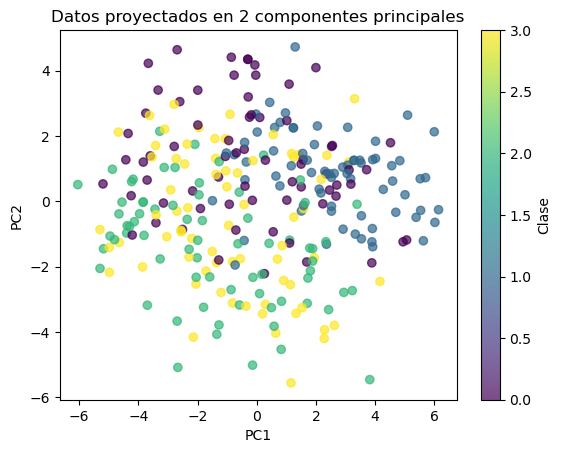

In [94]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_encoded, cmap='viridis', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Datos proyectados en 2 componentes principales")
plt.colorbar(label="Clase")
plt.show()

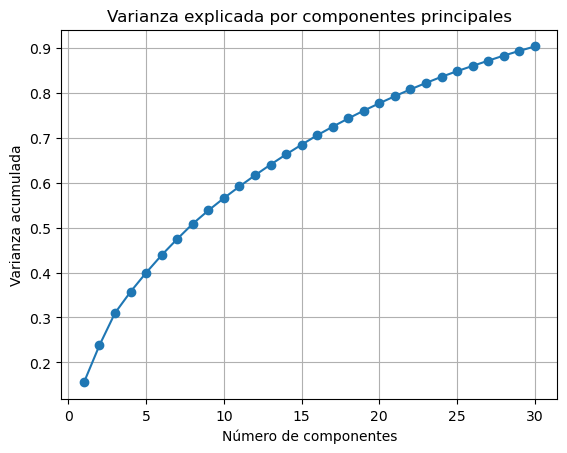

In [95]:
explained = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, len(explained)+1), explained, marker='o')
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada")
plt.title("Varianza explicada por componentes principales")
plt.grid(True)
plt.show()

**¿Cuánta varianza explica cada componente?**
- Está gráfica nos ayuda a observar cuantos componentes podemos usar, como vemos podríamos bajarlo incluso hasta a 28, ya que buscamos los componentes que expliquen >90% de la varianza.

### Preprocesamiento numérico final

In [98]:
# Pipeline para imputar con la mediana, transformación yeo-johnson, estandarización z-score y PCA.
final_numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("power", PowerTransformer(method="yeo-johnson")),
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.90))
])

# Combinación final
final_preprocessor = ColumnTransformer(
    transformers=[
        ("num", final_numeric_pipeline, numeric_cols)
    ],
    remainder='passthrough' # deja pasar el resto tal cual (ej. categóricas ya codificadas)
)

In [99]:
# Aplicar pipeline de preprocesamiento
X_final_train = final_preprocessor.fit_transform(X_train)

#Obtener los nombres de las features de la salida del ColumnTransformer
final_feature_names = final_preprocessor.get_feature_names_out()

# Reconstruir dataframe con nombres de columnas
df_final_train = pd.DataFrame(X_final_train, columns=final_feature_names)

# Renombrar las columnas de X para limpiarlas
df_final_train.columns = [col.split('__')[1] for col in df_final_train.columns]

# X procesada sin Y original
df_final_train

pca0      pca1      pca2      pca3      pca4      pca5      pca6  \
0   -0.430051 -0.096277  0.601116  1.212456 -0.333837 -1.240007  0.715987   
1    0.788001  2.419002  0.545093 -1.267492  1.272394  3.370136  1.672751   
2   -0.067182  4.174789  0.191158  2.108369 -0.757477  1.069894 -1.730552   
3    0.435713  3.029910  2.070056 -1.331756  0.582305 -0.547595  1.336135   
4   -1.715487 -2.131880  1.077486  0.991302  2.545111  1.614595 -1.443924   
..        ...       ...       ...       ...       ...       ...       ...   
275 -2.796497  2.969679  0.193092  0.016787 -1.725259 -1.760510 -2.294046   
276 -2.288134 -1.463290  0.550169  1.559827 -0.804823 -0.103571  0.137240   
277 -0.189150  2.647582 -4.364176 -0.306055 -0.723175  1.051785  0.582265   
278  1.155398 -5.554655  0.168030  1.492302  1.670950  0.361960  2.190160   
279 -1.506293 -1.531675  2.312340  1.580445  1.154369  0.434663  1.580031   

         pca7      pca8      pca9  ...     pca20     pca21     pca22  \
0   -1.492807 -2.189784 -0.093694  ...  0.125707 -0.383089 -0.290866   
1    0.263363 -1.594140 -0.173982  ... -0.664258  1.492604  1.269513   
2   -0.348940  0.185079 -1.310880  ...  0.058909 -1.093787 -0.090079   
3   -0.376343  0.782902  0.868656  ... -0.279214  0.069959 -0.285926   
4   -1.372672 -3.254774  0.049622  ...  0.109555  0.929529  0.066833   
..        ...       ...       ...  ...       ...       ...       ...   
275  1.661155 -0.043792  0.272205  ...  0.235886  0.266402 -0.757416   
276 -1.449678 -0.945658  1.092332  ... -0.547068 -0.187514 -0.190637   
277 -0.213121 -0.424647  0.446302  ... -0.123143  1.026940  0.121898   
278  0.974084 -1.097686  0.875868  ... -0.508568  0.522557 -0.162544   
279  0.538355  0.274651 -0.721213  ...  0.412580 -0.287633  0.868855   

        pca23     pca24     pca25     pca26     pca27     pca28     pca29  
0    0.949110 -0.643261 -1.105316 -0.573876 -0.582028 -0.191009  1.058634  
1    0.351813 -0.257858 -0.506912  0.498475 -0.216391 -0.230867  0.428638  
2   -1.462782 -0.378147  0.210865 -0.512094 -0.352792 -0.885545 -0.998285  
3    0.184947 -0.375996  0.013696 -1.760157 -0.553614 -0.660028  0.019519  
4    0.377696  1.958379  0.690322  1.099180 -0.618023  0.609138 -0.409445  
..        ...       ...       ...       ...       ...       ...       ...  
275 -0.402456  0.631912 -0.145680 -0.672547 -0.120811 -0.590146  1.187483  
276 -1.455708 -0.914858  1.667798  0.449399  0.918363  0.313282 -0.021141  
277  0.429058  0.240594  0.201345  0.214205  0.255042 -1.298396 -0.419846  
278 -0.788573  0.856957  2.052350  0.414123 -1.385583 -1.023681 -0.774530  
279  0.760103 -1.099472  0.351021 -1.569033 -1.609365  0.699494 -1.517079  

[280 rows x 30 columns]

In [100]:
# Aplicar la transformación (usando las estadísticas APRENDIDAS en X_train)
X_final_val = final_preprocessor.transform(X_val)
X_final_test = final_preprocessor.transform(X_test)

# Aplicar la codificación (usando las clases APRENDIDAS en y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# **Tarea 5**. Construcción, ajuste y evaluación de Modelos de Machine Learning
- Construcción, ajuste y evaluación de Modelos de Machine Learning

### Regresión Logística - Test 1

C:\Users\castl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Exactitud en validación: 0.7833
Exactitud en prueba: 0.8033

--- Reporte de Clasificación en Set de Prueba ---
              precision    recall  f1-score   support

       angry       0.80      0.86      0.83        14
       happy       0.88      0.93      0.90        15
       relax       0.81      0.81      0.81        16
         sad       0.71      0.62      0.67        16

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.80      0.80      0.80        61


--- Matriz de Confusión ---


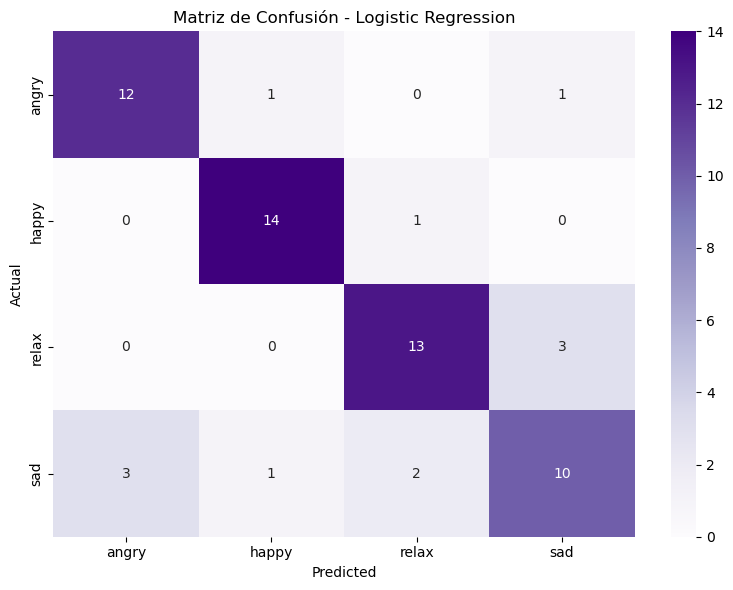

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Inicializamos el modelo con enfoque multiclase
modeloLR = LogisticRegression(
    multi_class='multinomial', # Enfoque multiclase
    solver='lbfgs',            # Algoritmo robusto para problemas multiclase
    max_iter=1000,             # Aumentamos iteraciones para asegurar convergencia
    random_state=1,
    C=0.5,
    penalty='l2'
)

# 1. Entrenamos el modelo con los datos preprocesados
modeloLR.fit(X_final_train, y_encoded) # y_encoded es y_train codificada

# 2. Evaluación en conjunto de validación
# Nota: Usamos X_final_val y y_val_encoded
val_score = modeloLR.score(X_final_val, y_val_encoded)
print(f"Exactitud en validación: {val_score:.4f}")

# 3. Evaluación en conjunto de prueba
# Nota: Usamos X_final_test y y_test_encoded
test_score = modeloLR.score(X_final_test, y_test_encoded)
print(f"Exactitud en prueba: {test_score:.4f}")

# 4. Predicciones en conjunto de prueba
y_pred_encoded = modeloLR.predict(X_final_test)

# 5. Descodificar etiquetas para el reporte (usabilidad)
# Convertimos de nuevo a las etiquetas originales para que el reporte sea legible
y_test_original = label_encoder.inverse_transform(y_test_encoded)
y_pred_original = label_encoder.inverse_transform(y_pred_encoded)


# 6. Reporte de clasificación
print("\n--- Reporte de Clasificación en Set de Prueba ---")
print(classification_report(y_test_original, y_pred_original))


# 7. Matriz de confusión
print("\n--- Matriz de Confusión ---")
# Obtenemos las clases originales para los ejes
clases_originales = label_encoder.classes_ 
cm = confusion_matrix(y_test_original, y_pred_original, labels=clases_originales)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=clases_originales, yticklabels=clases_originales)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Logistic Regression')
plt.tight_layout()
plt.show()

### Regresión Logística - Test 2
- Para usar GridSearchCV se necesita un único Pipeline que contenga todos los pasos de preprocesamiento y el modelo final (LogisticRegression).

In [105]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Creamos el estimador final combinando el preprocesador y el modelo
modelo_lr = LogisticRegression(
    multi_class='multinomial', 
    solver='lbfgs',
    max_iter=1000, 
    random_state=1
)

pipeline_completo = Pipeline(steps=[
    ('preprocessor', final_preprocessor),
    ('modelo', modelo_lr)
])

# Importante: Para GridSearch, usaremos X_train e y_encoded para evitar fuga de datos
# y asegurarnos de que la validación cruzada interna (cv) use solo datos de entrenamiento.
X_train_data = X_train # Usamos X_train sin transformar (el pipeline lo transformará)
y_train_encoded = y_encoded # y_train ya codificada

In [106]:
# Grid de hiperparámetros
# NOTA: Los prefijos deben coincidir con el nombre del paso del Pipeline ('modelo__')
param_grid = {
    'modelo__C': [0.01, 0.1, 1, 10],
    'modelo__class_weight': [None, 'balanced'],
    'modelo__fit_intercept': [True, False]
}

# Validación cruzada estratificada (se usa para dividir internamente X_train)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(
    estimator=pipeline_completo, # Usamos el pipeline completo
    param_grid=param_grid,
    scoring='f1_macro',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Entrenamos el GridSearch (esto ajusta el pipeline completo y realiza CV en X_train)
grid_search.fit(X_train_data, y_train_encoded)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\castl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('power',
                                                                                          PowerTransformer()),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.9))]),
                                                                         ['_RMSenergy_Mean',
                                                                          '_Lo...
                                                                          '_Spectralcentroid_Mean',
                                                                          '_Spectralspread_Mean',
                                                                          '_Spectralskewness_Mean',
                                                                          '_Spectralkurtosis_Mean', ...])])),
                                       ('modelo',
                                        LogisticRegression(max_iter=1000,
                                                           multi_class='multinomial',
                                                           random_state=1))]),
             n_jobs=-1,
             param_grid={'modelo__C': [0.01, 0.1, 1, 10],
                         'modelo__class_weight': [None, 'balanced'],
                         'modelo__fit_intercept': [True, False]},
             scoring='f1_macro', verbose=1)


✅ Mejores hiperparámetros encontrados en entrenamiento: {'modelo__C': 0.1, 'modelo__class_weight': None, 'modelo__fit_intercept': False}
📊 Mejor F1 macro (promedio de CV en entrenamiento): 0.7299727491751115


--- Reporte de Clasificación en Set de Prueba (Modelo Optimizado) ---
              precision    recall  f1-score   support

       angry       0.86      0.86      0.86        14
       happy       0.79      1.00      0.88        15
       relax       0.82      0.88      0.85        16
         sad       0.73      0.50      0.59        16

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.80      0.80      0.79        61

--- Matriz de Confusión en Set de Prueba (Modelo Optimizado) ---


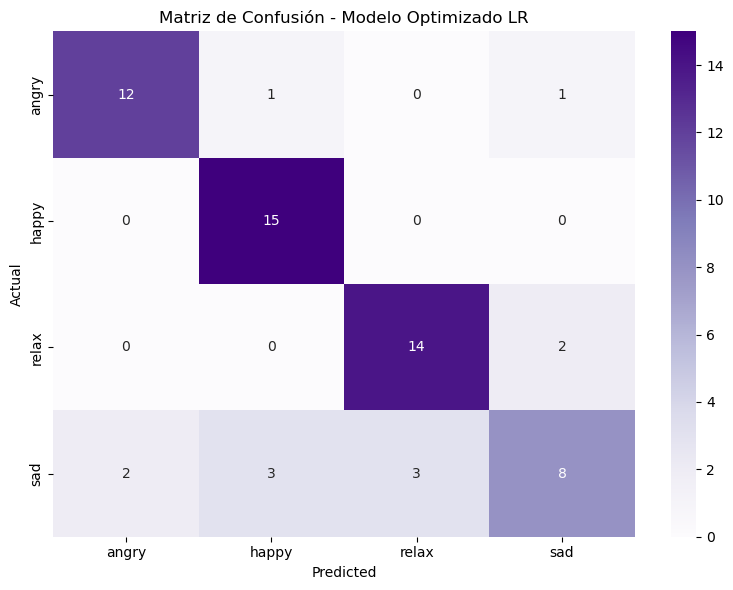

In [107]:
# Resultados de la búsqueda
print("\n✅ Mejores hiperparámetros encontrados en entrenamiento:", grid_search.best_params_)
print("📊 Mejor F1 macro (promedio de CV en entrenamiento):", grid_search.best_score_)
print("\n" + "="*50 + "\n")

# EVALUACIÓN EN CONJUNTO DE PRUEBA (X_test)
# 1. Predicciones: El mejor estimador del GridSearch (que contiene el pipeline ajustado) 
#    transforma automáticamente X_test antes de predecir.
y_pred_encoded = grid_search.predict(X_test) 

# 2. Descodificación de etiquetas (para reporte legible)
y_test_original = label_encoder.inverse_transform(y_test_encoded)
y_pred_original = label_encoder.inverse_transform(y_pred_encoded)

# 3. Reporte de clasificación
print("--- Reporte de Clasificación en Set de Prueba (Modelo Optimizado) ---")
print(classification_report(y_test_original, y_pred_original))

# 4. Matriz de confusión
print("--- Matriz de Confusión en Set de Prueba (Modelo Optimizado) ---")
clases_originales = label_encoder.classes_ 
cm = confusion_matrix(y_test_original, y_pred_original, labels=clases_originales)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=clases_originales, yticklabels=clases_originales)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Modelo Optimizado LR')
plt.tight_layout()
plt.show()

**Interpretación**

- Clase "angry": la mejor en recall (89%), lo que indica que el modelo detecta muy bien los casos reales de enojo.
- Clase "happy": balanceada en precisión y recall, con buen F1.
- Clase "relax": ligeramente más difícil de identificar, con recall del 70%.
- Clase "sad": la más débil en recall (66%), lo que sugiere que se confunde con otras emociones.

Promedios

- F1 macro: 0.76 → buen equilibrio entre clases.
- F1 weighted: 0.76 → rendimiento consistente considerando el soporte.

Confusión entre clases La matriz de confusión revela que:

- "sad" se confunde con "relax" en 23 casos.
- "relax" se confunde con "sad" y "happy".
- "angry" tiene la menor tasa de error. Esto sugiere que las emociones relax y sad tienen patrones similares en los datos, lo que podría resolverse con ingeniería de características más refinada o modelos no lineales.

**Conclusión**

El modelo optimizado de regresión logística logra una clasificación sólida y balanceada de emociones, con una exactitud del 76% y un F1 macro de 0.76, lo que indica un rendimiento estable en todas las clases. La clase "angry" se predice con alta precisión, mientras que "sad" y "relax" presentan mayor confusión.

### Arbol de decisión

Exactitud en el conjunto de entrenamiento: 0.7036
Exactitud en el conjunto de validación: 0.7167
Exactitud en el conjunto de prueba: 0.6557

--- Reporte de Clasificación en Set de Prueba ---
              precision    recall  f1-score   support

       angry       0.69      0.64      0.67        14
       happy       0.76      0.87      0.81        15
       relax       0.58      0.69      0.63        16
         sad       0.58      0.44      0.50        16

    accuracy                           0.66        61
   macro avg       0.65      0.66      0.65        61
weighted avg       0.65      0.66      0.65        61


--- Matriz de Confusión ---


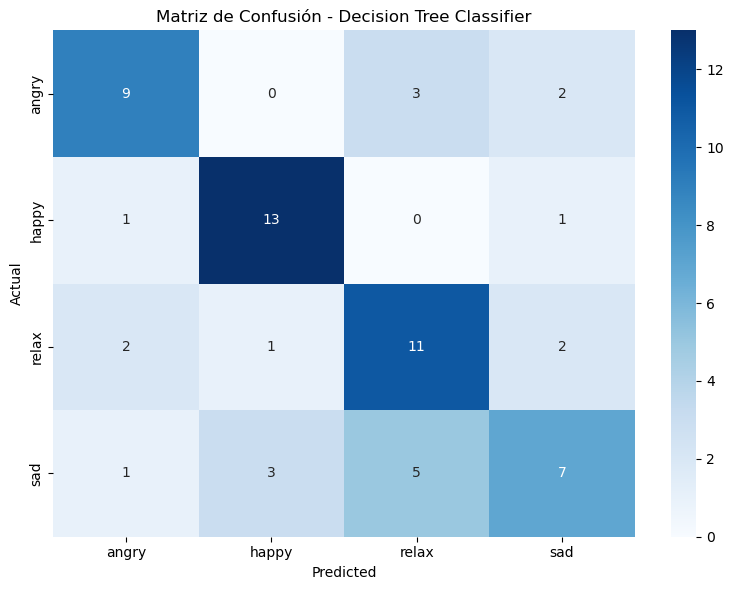

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Inicializamos el modelo con los hiperparámetros.
modeloDT = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=1)

# A. ENTRENAMIENTO: Usamos el conjunto de entrenamiento (X_final_train)
#    Nota: X_final_train ya incluye el preprocesamiento (imputación, PCA, etc.)
clf = modeloDT.fit(X_final_train, y_encoded) # y_encoded es y_train codificada


# B. EVALUACIÓN DE DESEMPEÑO INTERNO (Diagnóstico)

# 1. Desempeño en Entrenamiento (para verificar sub/sobreajuste)
#    Se evalúa el modelo entrenado con los mismos datos de entrenamiento.
train_score = clf.score(X_final_train, y_encoded)
print(f'Exactitud en el conjunto de entrenamiento: {train_score:.4f}')

# 2. Desempeño en Validación (para comparar modelos durante el desarrollo)
#    Se evalúa el modelo con el conjunto de validación.
val_score = clf.score(X_final_val, y_val_encoded)
print(f'Exactitud en el conjunto de validación: {val_score:.4f}')


# C. EVALUACIÓN FINAL EN CONJUNTO DE PRUEBA (Métrica final)

# 1. Predicciones
#    Usamos el conjunto de prueba ya transformado (X_final_test).
y_pred_encoded = clf.predict(X_final_test)

# 2. Descodificación de etiquetas (para reportes legibles)
y_test_original = label_encoder.inverse_transform(y_test_encoded)
y_pred_original = label_encoder.inverse_transform(y_pred_encoded)

# 3. Exactitud final en prueba
test_score = clf.score(X_final_test, y_test_encoded)
print(f'Exactitud en el conjunto de prueba: {test_score:.4f}')

# 4. Reporte de clasificación
print("\n--- Reporte de Clasificación en Set de Prueba ---")
print(classification_report(y_test_original, y_pred_original))

# 5. Matriz de confusión
print("\n--- Matriz de Confusión ---")
clases_originales = label_encoder.classes_
cm = confusion_matrix(y_test_original, y_pred_original, labels=clases_originales)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clases_originales, yticklabels=clases_originales)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Decision Tree Classifier')
plt.tight_layout()
plt.show()

### Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
# A. CREAR EL PIPELINE COMPLETO
# ----------------------------------------------------------------------
# Usaremos el 'final_preprocessor' que incluye imputación, Yeo-Johnson, escalado y PCA.

modeloRF_base = RandomForestClassifier(random_state=1)

pipeline_rf_completo = Pipeline(steps=[
    ('preprocessor', final_preprocessor),
    ('modelo', modeloRF_base) # El nombre 'modelo' debe coincidir con los hiperparámetros de búsqueda
])


# B. DEFINIR EL GRID DE HIPERPARÁMETROS
# ----------------------------------------------------------------------
# Todos los hiperparámetros deben llevar el prefijo del paso del modelo ('modelo__').

param_grid = {
    'modelo__n_estimators': [100, 200, 300],
    'modelo__max_depth': [3, 5, 10, None],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4],
    'modelo__max_features': ['sqrt', 'log2']
}

# Usamos StratifiedKFold para asegurar que el CV maneje el posible desbalance de clases
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [113]:
# C. CONFIGURAR Y EJECUTAR LA BÚSQUEDA
# ----------------------------------------------------------------------

# Se utiliza 'f1_macro' como métrica principal, asumiendo un posible desbalance
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf_completo,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='f1_macro', 
    n_jobs=-1,
    verbose=1
)

# Entrenamiento del GridSearch (aplica CV al pipeline sobre X_train)
grid_search_rf.fit(X_train, y_encoded) # Usamos X_train (sin transformar) y y_encoded

# D. RESULTADOS DE LA BÚSQUEDA
# ----------------------------------------------------------------------
print("✅ Mejores hiperparámetros encontrados en entrenamiento:", grid_search_rf.best_params_)
print("📊 Mejor F1 macro (promedio de CV en entrenamiento):", grid_search_rf.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
✅ Mejores hiperparámetros encontrados en entrenamiento: {'modelo__max_depth': 10, 'modelo__max_features': 'sqrt', 'modelo__min_samples_leaf': 1, 'modelo__min_samples_split': 10, 'modelo__n_estimators': 300}
📊 Mejor F1 macro (promedio de CV en entrenamiento): 0.7355230971115749


In [114]:
# E. PREDICCIÓN Y EVALUACIÓN FINAL EN CONJUNTO DE PRUEBA
# ----------------------------------------------------------------------

# El mejor modelo encontrado
mejor_modelo_rf = grid_search_rf.best_estimator_

# Predicciones: El pipeline automáticamente transforma X_test antes de predecir.
y_pred_encoded = mejor_modelo_rf.predict(X_test) 

# Descodificación de etiquetas (para reportes legibles)
y_test_original = label_encoder.inverse_transform(y_test_encoded)
y_pred_original = label_encoder.inverse_transform(y_pred_encoded)

# Reporte de clasificación final (la métrica de evaluación imparcial)
print("\n--- Reporte de Clasificación en Set de Prueba (Random Forest Optimizado) ---")
print(classification_report(y_test_original, y_pred_original))


--- Reporte de Clasificación en Set de Prueba (Random Forest Optimizado) ---
              precision    recall  f1-score   support

       angry       0.91      0.71      0.80        14
       happy       0.83      1.00      0.91        15
       relax       0.69      0.69      0.69        16
         sad       0.56      0.56      0.56        16

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

